In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from datetime import datetime
from pandas import set_option
data=pd.read_csv('c:/datasets/crime_data_Proj1.csv')

In [2]:
#inspecting the data

In [3]:
'''Inspecting first five rows of data'''
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [4]:
'''Inspecting last five rows of data'''
data.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
2278721,2278721,10716043,HZ474139,10/14/2016 02:35:00 PM,006XX N CLARK ST,0560,ASSAULT,SIMPLE,CONVENIENCE STORE,True,...,42.0,8.0,08A,1175423.0,1904617.0,2016,02/10/2018 03:50:01 PM,41.893647,-87.631177,"(41.893646656, -87.631177143)"
2278722,2278722,1740109,G546340,09/11/2001 10:20:00 PM,052XX W LAKE ST,0460,BATTERY,SIMPLE,RESIDENCE,False,...,NaN,NaN,08B,1141137.0,1902008.0,2001,08/17/2015 03:03:40 PM,41.887188,-87.757163,"(41.887188151, -87.757163155)"
2278723,2278723,4737434,HM342705,05/10/2006 07:49:00 PM,007XX E OAKWOOD BLVD,0560,ASSAULT,SIMPLE,APARTMENT,False,...,4.0,38.0,08A,1181989.0,1878827.0,2006,02/28/2018 03:56:25 PM,41.822727,-87.607863,"(41.82272748, -87.607863136)"
2278724,2278724,11122832,JA476827,10/18/2017 10:30:00 PM,002XX W ERIE ST,1360,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,...,42.0,8.0,26,1174469.0,1904732.0,2017,02/10/2018 03:50:01 PM,41.893984,-87.634677,"(41.893983593, -87.634677382)"
2278725,2278725,3409804,HK420105,06/09/2004 08:19:28 PM,016XX N ROCKWELL ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,...,1.0,24.0,18,1158782.0,1910845.0,2004,02/28/2018 03:56:25 PM,41.911094,-87.692123,"(41.91109424, -87.692122762)"


In [5]:
'''Checking data shape'''
Shape=data.shape
Shape

(2278726, 23)

In [6]:
'''Checking columns in data'''
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [7]:
'''Checking summary of data and data types in data'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [8]:
'''Counting values in each column reveals presence of missing values in data'''
data.count()

Unnamed: 0              2278726
ID                      2278726
Case Number             2278725
Date                    2278726
Block                   2278726
IUCR                    2278726
Primary Type            2278726
Description             2278726
Location Description    2275849
Arrest                  2278726
Domestic                2278726
Beat                    2278726
District                2278714
Ward                    2094031
Community Area          2094459
FBI Code                2278726
X Coordinate            2254741
Y Coordinate            2254741
Year                    2278726
Updated On              2278726
Latitude                2254741
Longitude               2254741
Location                2254741
dtype: int64

In [9]:
'''
Checking unique count for each column
Case number unique count is lower than ID unique count indicating that there are some duplicated case numbers
'''
data.nunique()

Unnamed: 0              2278726
ID                      2278726
Case Number             2278678
Date                    1343546
Block                     54347
IUCR                        392
Primary Type                 35
Description                 515
Location Description        198
Arrest                        2
Domestic                      2
Beat                        304
District                     23
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              73335
Y Coordinate             122589
Year                         22
Updated On                 4461
Latitude                 544919
Longitude                544655
Location                 545376
dtype: int64

In [10]:
'''
Summary of numerical columns in data to help understand data integers
Non-numerical colums will have to be transformed to get a better picture of the data
'''
data.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.278726e+06,2.278726e+06,2.278726e+06,2.278714e+06,2.094031e+06,2.094459e+06,2.254741e+06,2.254741e+06,2.278726e+06,2.254741e+06,2.254741e+06
mean,1.139362e+06,6.882068e+06,1.186442e+03,1.129072e+01,2.272764e+01,3.752140e+01,1.164569e+06,1.885747e+06,2.009638e+03,4.184209e+01,-8.767161e+01
std,6.578117e+05,3.419168e+06,7.026836e+02,6.946692e+00,1.383464e+01,2.153282e+01,1.673955e+04,3.209855e+04,6.019724e+00,8.830434e-02,6.073538e-02
min,0.000000e+00,6.370000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,5.696812e+05,3.716076e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152948e+06,1.859053e+06,2.004000e+03,4.176866e+01,-8.771379e+01
50%,1.139362e+06,6.885990e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166060e+06,1.890673e+06,2.009000e+03,4.185578e+01,-8.766597e+01
75%,1.709044e+06,9.887568e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176365e+06,1.909219e+06,2.014000e+03,4.190668e+01,-8.762823e+01
max,2.278725e+06,1.278199e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.022000e+03,4.202291e+01,-8.752453e+01


In [11]:
'''Checking for NA values'''
data.isna().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [12]:
'''Checking for null values'''
data.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [13]:
'''Checking for Skewness'''
Skew=data.skew()
Skew

Unnamed: 0        1.720875e-15
ID                3.792553e-02
Arrest            1.065947e+00
Domestic          2.104784e+00
Beat              3.888004e-01
District          4.364170e-01
Ward              1.715494e-01
Community Area    1.800930e-01
X Coordinate     -4.438138e+00
Y Coordinate     -2.562736e+00
Year              3.465047e-01
Latitude         -2.614833e+00
Longitude        -3.857195e+00
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

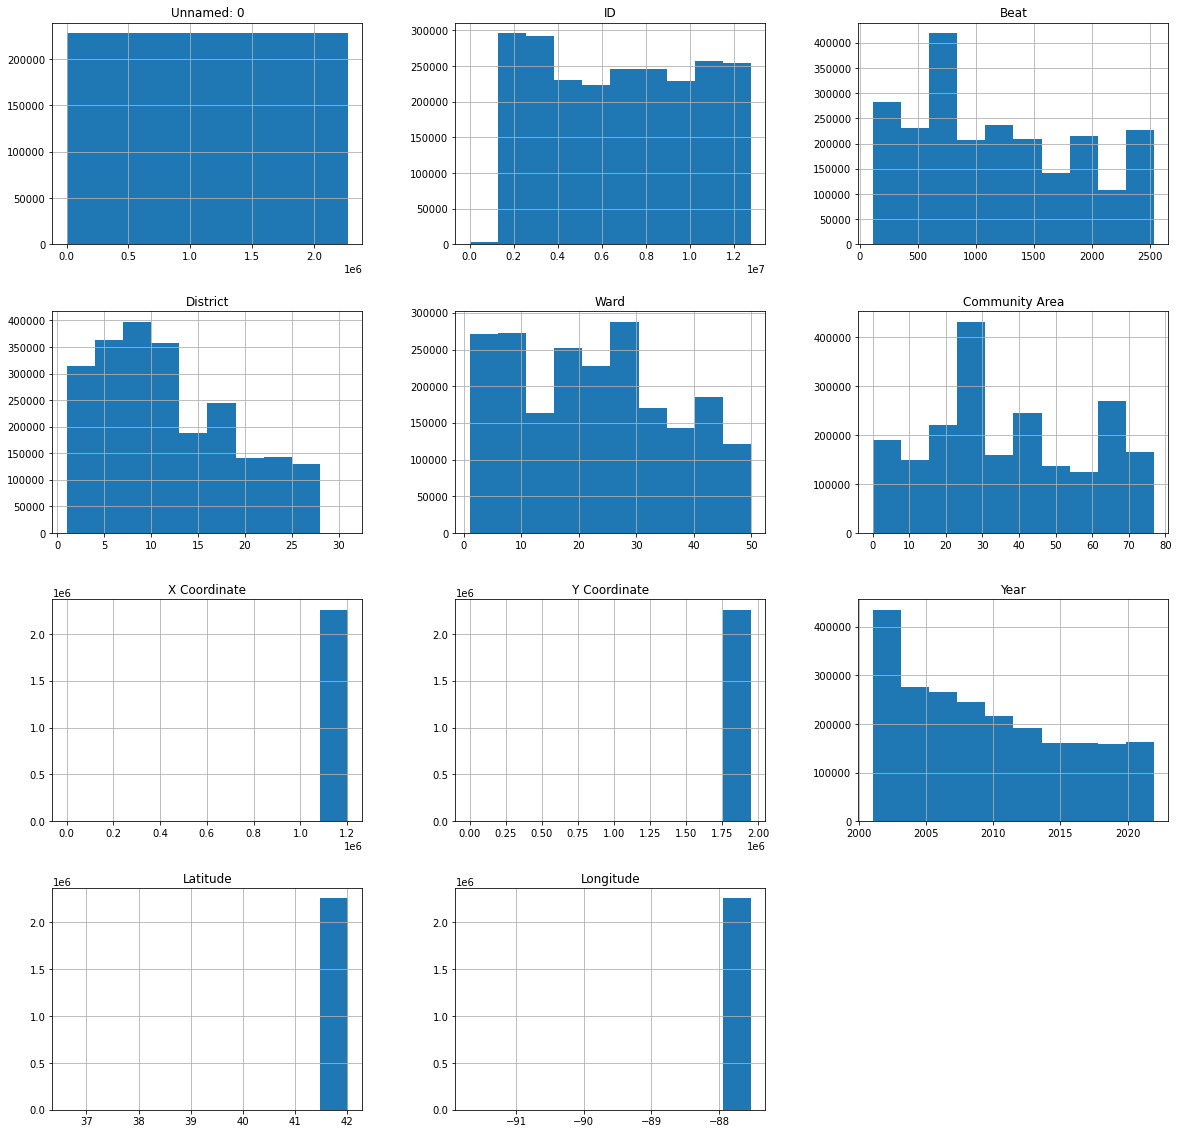

In [14]:
'''
Plotting numerical colummns to better understand data skewness
Data will have to processed to treat skewness
'''

from matplotlib import pyplot

data.hist()
plt.gcf().set_size_inches(20,20)
pyplot.show

In [15]:
#Data Preparation(Treating of missing values)

In [16]:
'''
The rows with missing values were drop given that they only consituted 9% of the entire sample size and to ensure that 
the model only focuses on correct data
'''

'\nThe rows with missing values were drop given that they only consituted 9% of the entire sample size and to ensure that \nthe model only focuses on correct data\n'

In [17]:
data2=data.dropna()
data2.isna().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [18]:
'''All columns with empty rows have been removed from the data'''
data2.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [19]:
'''Duplicate case numbers are still present in the data'''
data2.nunique()


Unnamed: 0              2070581
ID                      2070581
Case Number             2070535
Date                    1230193
Block                     33841
IUCR                        389
Primary Type                 35
Description                 511
Location Description        198
Arrest                        2
Domestic                      2
Beat                        303
District                     23
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              70173
Y Coordinate             117135
Year                         22
Updated On                 3620
Latitude                 450183
Longitude                449993
Location                 450496
dtype: int64

In [20]:
#Data Preparation(Treating of duplicate case numbers)
'''
The data will first be sorted based on the 'Updated On' column to ensure that the latest version of each case is used for
the analysis
'''

"\nThe data will first be sorted based on the 'Updated On' column to ensure that the latest version of each case is used for\nthe analysis\n"

In [21]:
'''
Sorting the data based on 'Updated on' column
'''
data3=data2.sort_values(by='Updated On', ascending=True)
data3=data3.reset_index()

'''
Removing duplicate case numbers and focusing on latest updates
'''
data4=data3.drop_duplicates(subset='Case Number', keep='last')
data4=data4.reset_index()
data4

,level_0,index,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,445643,445643,10358591,HY549694,12/25/2015 12:01:00 AM,089XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,...,8.0,47.0,14,1185108.0,1846011.0,2015,01/01/2016 03:54:40 PM,41.732605,-87.597451,"(41.732604656, -87.597451164)"
1,1,523977,523977,10358892,HY550086,12/25/2015 08:54:00 PM,074XX S SOUTH SHORE DR,2027,NARCOTICS,POSS: CRACK,...,7.0,43.0,18,1195788.0,1856597.0,2015,01/01/2016 03:54:40 PM,41.761396,-87.557977,"(41.761396234, -87.557976827)"
2,2,669612,669612,10359079,HY550296,12/25/2015 08:15:00 PM,073XX S PHILLIPS AVE,0820,THEFT,$500 AND UNDER,...,7.0,43.0,06,1193919.0,1856789.0,2015,01/01/2016 03:54:40 PM,41.761969,-87.564820,"(41.76196912, -87.564820445)"
3,3,1580779,1580779,10358657,HY549678,12/25/2015 09:00:00 AM,054XX W RACE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,...,37.0,25.0,08B,1139864.0,1903023.0,2015,01/01/2016 03:54:40 PM,41.889997,-87.761813,"(41.889996798, -87.761813218)"
4,4,343550,343550,10358915,HY550126,12/25/2015 10:30:00 PM,064XX N ROCKWELL ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,...,50.0,2.0,07,1157820.0,1942633.0,2015,01/01/2016 03:54:40 PM,41.998342,-87.694787,"(41.998342083, -87.694786705)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070530,2070576,1939747,1939747,12578209,JE490111,12/24/2021 06:00:00 PM,046XX S KEELER AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,...,14.0,57.0,11,1149136.0,1873582.0,2021,12/31/2021 03:53:44 PM,41.809032,-87.728523,"(41.809032436, -87.72852342)"
2070531,2070577,162074,162074,12576169,JE487716,12/24/2021 11:50:00 AM,075XX S STONY ISLAND AVE,0850,THEFT,ATTEMPT THEFT,...,8.0,43.0,06,1188125.0,1855104.0,2021,12/31/2021 03:53:44 PM,41.757485,-87.586109,"(41.757485413, -87.586109433)"
2070532,2070578,1838213,1838213,12576044,JE487514,12/24/2021 05:15:00 AM,062XX S MAJOR AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,...,13.0,64.0,08B,1139479.0,1862602.0,2021,12/31/2021 03:53:44 PM,41.779082,-87.764211,"(41.779082466, -87.764210646)"
2070533,2070579,994941,994941,12577810,JE489632,12/24/2021 07:00:00 PM,006XX N LEAMINGTON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,...,37.0,25.0,11,1141915.0,1903723.0,2021,12/31/2021 03:53:44 PM,41.891880,-87.754264,"(41.891879948, -87.754263576)"


In [22]:
data4=data4.drop(['index','level_0'], axis=1)
print(data4.shape)

(2070535, 23)


In [23]:
data4

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,445643,10358591,HY549694,12/25/2015 12:01:00 AM,089XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,8.0,47.0,14,1185108.0,1846011.0,2015,01/01/2016 03:54:40 PM,41.732605,-87.597451,"(41.732604656, -87.597451164)"
1,523977,10358892,HY550086,12/25/2015 08:54:00 PM,074XX S SOUTH SHORE DR,2027,NARCOTICS,POSS: CRACK,RESIDENCE-GARAGE,True,...,7.0,43.0,18,1195788.0,1856597.0,2015,01/01/2016 03:54:40 PM,41.761396,-87.557977,"(41.761396234, -87.557976827)"
2,669612,10359079,HY550296,12/25/2015 08:15:00 PM,073XX S PHILLIPS AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,...,7.0,43.0,06,1193919.0,1856789.0,2015,01/01/2016 03:54:40 PM,41.761969,-87.564820,"(41.76196912, -87.564820445)"
3,1580779,10358657,HY549678,12/25/2015 09:00:00 AM,054XX W RACE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,37.0,25.0,08B,1139864.0,1903023.0,2015,01/01/2016 03:54:40 PM,41.889997,-87.761813,"(41.889996798, -87.761813218)"
4,343550,10358915,HY550126,12/25/2015 10:30:00 PM,064XX N ROCKWELL ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,...,50.0,2.0,07,1157820.0,1942633.0,2015,01/01/2016 03:54:40 PM,41.998342,-87.694787,"(41.998342083, -87.694786705)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070530,1939747,12578209,JE490111,12/24/2021 06:00:00 PM,046XX S KEELER AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,...,14.0,57.0,11,1149136.0,1873582.0,2021,12/31/2021 03:53:44 PM,41.809032,-87.728523,"(41.809032436, -87.72852342)"
2070531,162074,12576169,JE487716,12/24/2021 11:50:00 AM,075XX S STONY ISLAND AVE,0850,THEFT,ATTEMPT THEFT,DEPARTMENT STORE,False,...,8.0,43.0,06,1188125.0,1855104.0,2021,12/31/2021 03:53:44 PM,41.757485,-87.586109,"(41.757485413, -87.586109433)"
2070532,1838213,12576044,JE487514,12/24/2021 05:15:00 AM,062XX S MAJOR AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,13.0,64.0,08B,1139479.0,1862602.0,2021,12/31/2021 03:53:44 PM,41.779082,-87.764211,"(41.779082466, -87.764210646)"
2070533,994941,12577810,JE489632,12/24/2021 07:00:00 PM,006XX N LEAMINGTON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,...,37.0,25.0,11,1141915.0,1903723.0,2021,12/31/2021 03:53:44 PM,41.891880,-87.754264,"(41.891879948, -87.754263576)"


In [24]:
'''
Duplicate case numbers have been removed leaving the latest updates
'''
data4.nunique()


Unnamed: 0              2070535
ID                      2070535
Case Number             2070535
Date                    1230170
Block                     33841
IUCR                        389
Primary Type                 35
Description                 511
Location Description        198
Arrest                        2
Domestic                      2
Beat                        303
District                     23
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              70173
Y Coordinate             117135
Year                         22
Updated On                 3620
Latitude                 450183
Longitude                449993
Location                 450496
dtype: int64

In [25]:
#Adding extra columns 

In [26]:
'''Splitting the time column into day, month and Period'''
data5=data4

In [27]:
from dateutil.parser import parse
from datetime import datetime
tCol = data5.Date



List = [(datetime.ctime(parse(x[0:-3])),x[-2:]) for x in tCol]
dayList = []
monthList = []
periodList = []
for row in List:
    day = row[0][0:4]
    month = row[0][4:7]
    if row[1]=='AM':
        period = 'Morning'
    elif row[1] =='PM' and int(row[0][11:13])<4:
        period = 'Afternoon'
    elif row[1] =='PM' and int(row[0][11:13])<5:
        period = 'Evening'
    elif row[1] =='PM' and int(row[0][11:13])>5:
        period = 'Night'
    else:
        period = 'Unknown'
        
    dayList.append(day)
    monthList.append(month)
    periodList.append(period)
    
data5['Day'] = dayList
data5['Month'] = monthList
data5['Period'] = periodList


data5.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Month,Period
0,445643,10358591,HY549694,12/25/2015 12:01:00 AM,089XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,1185108.0,1846011.0,2015,01/01/2016 03:54:40 PM,41.732605,-87.597451,"(41.732604656, -87.597451164)",Fri,Dec,Morning
1,523977,10358892,HY550086,12/25/2015 08:54:00 PM,074XX S SOUTH SHORE DR,2027,NARCOTICS,POSS: CRACK,RESIDENCE-GARAGE,True,...,1195788.0,1856597.0,2015,01/01/2016 03:54:40 PM,41.761396,-87.557977,"(41.761396234, -87.557976827)",Fri,Dec,Night
2,669612,10359079,HY550296,12/25/2015 08:15:00 PM,073XX S PHILLIPS AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,...,1193919.0,1856789.0,2015,01/01/2016 03:54:40 PM,41.761969,-87.564820,"(41.76196912, -87.564820445)",Fri,Dec,Night
3,1580779,10358657,HY549678,12/25/2015 09:00:00 AM,054XX W RACE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1139864.0,1903023.0,2015,01/01/2016 03:54:40 PM,41.889997,-87.761813,"(41.889996798, -87.761813218)",Fri,Dec,Morning
4,343550,10358915,HY550126,12/25/2015 10:30:00 PM,064XX N ROCKWELL ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,...,1157820.0,1942633.0,2015,01/01/2016 03:54:40 PM,41.998342,-87.694787,"(41.998342083, -87.694786705)",Fri,Dec,Night


In [28]:
data5.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Month,Period
2070530,1939747,12578209,JE490111,12/24/2021 06:00:00 PM,046XX S KEELER AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,...,1149136.0,1873582.0,2021,12/31/2021 03:53:44 PM,41.809032,-87.728523,"(41.809032436, -87.72852342)",Fri,Dec,Night
2070531,162074,12576169,JE487716,12/24/2021 11:50:00 AM,075XX S STONY ISLAND AVE,0850,THEFT,ATTEMPT THEFT,DEPARTMENT STORE,False,...,1188125.0,1855104.0,2021,12/31/2021 03:53:44 PM,41.757485,-87.586109,"(41.757485413, -87.586109433)",Fri,Dec,Morning
2070532,1838213,12576044,JE487514,12/24/2021 05:15:00 AM,062XX S MAJOR AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1139479.0,1862602.0,2021,12/31/2021 03:53:44 PM,41.779082,-87.764211,"(41.779082466, -87.764210646)",Fri,Dec,Morning
2070533,994941,12577810,JE489632,12/24/2021 07:00:00 PM,006XX N LEAMINGTON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,...,1141915.0,1903723.0,2021,12/31/2021 03:53:44 PM,41.891880,-87.754264,"(41.891879948, -87.754263576)",Fri,Dec,Night
2070534,1194313,12576050,JE487450,12/24/2021 02:00:00 AM,061XX S UNIVERSITY AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,...,1184830.0,1864490.0,2021,12/31/2021 03:53:44 PM,41.783319,-87.597891,"(41.783319361, -87.597890858)",Fri,Dec,Morning


In [29]:
data5.shape

(2070535, 26)

In [30]:
data5.count()

Unnamed: 0              2070535
ID                      2070535
Case Number             2070535
Date                    2070535
Block                   2070535
IUCR                    2070535
Primary Type            2070535
Description             2070535
Location Description    2070535
Arrest                  2070535
Domestic                2070535
Beat                    2070535
District                2070535
Ward                    2070535
Community Area          2070535
FBI Code                2070535
X Coordinate            2070535
Y Coordinate            2070535
Year                    2070535
Updated On              2070535
Latitude                2070535
Longitude               2070535
Location                2070535
Day                     2070535
Month                   2070535
Period                  2070535
dtype: int64

In [31]:
print('Unknown values are present in the period column')
print('Day column values count')
print(data5['Day'].value_counts())
print('Month column values count')
print(data5['Month'].value_counts())
print('Period column values count')
data5['Period'].value_counts()

Unknown values are present in the period column
Day column values count
Fri     311378
Wed     297795
Sat     296882
Tue     295665
Thu     294207
Mon     292252
Sun     282356
Name: Day, dtype: int64
Month column values count
Jul    198317
Aug    191093
May    190584
Jun    190564
Oct    180503
Sep    179077
Apr    166268
Mar    164238
Nov    162561
Jan    155405
Dec    154557
Feb    137368
Name: Month, dtype: int64
Period column values count


Night        782032
Morning      763301
Afternoon    313852
Unknown      106585
Evening      104765
Name: Period, dtype: int64

In [32]:
'''Adding the violent crime column'''
data6=data5

In [33]:
List = data6['Primary Type']
violentCrimeList = []
for row in List:
    if row=='CRIMINAL DAMAGE':
        violentCrime='Violent Crime'
    elif row=='WEAPONS VIOLATION':
        violentCrime='Non-violent Crime'
    elif row=='BURGLARY':
        violentCrime='Violent Crime'
    elif row=='ASSAULT':
        violentCrime='Violent Crime'
    elif row=='THEFT':
        violentCrime='Violent Crime'
    elif row=='ROBBERY':
        violentCrime='Violent Crime'
    elif row=='NARCOTICS':
        violentCrime='Non-violent Crime'
    elif row=='MOTOR VEHICLE THEFT':
        violentCrime=='Violent Crime' 
    elif row=='BATTERY':
        violentCrime='Non-violent Crime'
    elif row=='OTHER OFFENSE':
        violentCrime='Non-violent Crime'
    elif row=='PROSTITUTION':
        violentCrime='Non-violent Crime'
    elif row=='DECEPTIVE PRACTICE':
        violentCrime='Non-violent Crime'
    elif row=='INTIMIDATION':
        violentCrime='Non-violent Crime'
    elif row=='INTERFERENCE WITH PUBLIC OFFICER':
        violentCrime='Violent Crime' 
    elif row=='CRIMINAL TRESPASS':
        violentCrime='Non-violent Crime'
    elif row=='STALKING':
        violentCrime='Non-violent Crime'
    elif row=='OFFENSE INVOLVING CHILDREN':
        violentCrime='Violent Crime' 
    elif row=='PUBLIC PEACE VIOLATION':
        violentCrime='Non-violent Crime'
    elif row=='SEX OFFENSE':
        violentCrime='Violent Crime'
    elif row=='CRIM SEXUAL ASSAULT':
        violentCrime='Violent Crime' 
    elif row=='HOMICIDE':
        violentCrime='Violent Crime' 
    elif row=='LIQUOR LAW VIOLATION':
        violentCrime='Non-violent Crime'
    elif row=='CRIMINAL SEXUAL ASSAULT':
        violentCrime='Violent Crime' 
    elif row=='KIDNAPPING':
        violentCrime='Violent Crime'
    elif row=='ARSON':
        violentCrime='Violent Crime' 
    elif row=='GAMBLING':
        violentCrime='Non-violent Crime'
    elif row=='CONCEALED CARRY LICENSE VIOLATION':
        violentCrime='Non-violent Crime'  
    elif row=='PUBLIC INDECENCY':
        violentCrime='Non-violent Crime' 
    elif row=='RITUALISM':
        violentCrime='Violent Crime'
    elif row=='OBSCENITY':
        violentCrime='Non-violent Crime'  
    elif row=='NON - CRIMINAL':
        violentCrime='Non-violent Crime'  
    elif row=='OTHER NARCOTIC VIOLATION':
        violentCrime='Non-violent Crime'
    elif row=='HUMAN TRAFFICKING':
        violentCrime='Violent Crime' 
    elif row=='NON-CRIMINAL':
        violentCrime='Non-violent Crime'  
    elif row=='NON-CRIMINAL (SUBJECT SPECIFIED)':
        violentCrime='Non-violent Crime' 
    else:
        violentCrime='Unknown'
        
    violentCrimeList.append(violentCrime)
        

        
data6['Violent Crime']=violentCrimeList
data6

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Month,Period,Violent Crime
0,445643,10358591,HY549694,12/25/2015 12:01:00 AM,089XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,1846011.0,2015,01/01/2016 03:54:40 PM,41.732605,-87.597451,"(41.732604656, -87.597451164)",Fri,Dec,Morning,Violent Crime
1,523977,10358892,HY550086,12/25/2015 08:54:00 PM,074XX S SOUTH SHORE DR,2027,NARCOTICS,POSS: CRACK,RESIDENCE-GARAGE,True,...,1856597.0,2015,01/01/2016 03:54:40 PM,41.761396,-87.557977,"(41.761396234, -87.557976827)",Fri,Dec,Night,Non-violent Crime
2,669612,10359079,HY550296,12/25/2015 08:15:00 PM,073XX S PHILLIPS AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,...,1856789.0,2015,01/01/2016 03:54:40 PM,41.761969,-87.564820,"(41.76196912, -87.564820445)",Fri,Dec,Night,Violent Crime
3,1580779,10358657,HY549678,12/25/2015 09:00:00 AM,054XX W RACE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1903023.0,2015,01/01/2016 03:54:40 PM,41.889997,-87.761813,"(41.889996798, -87.761813218)",Fri,Dec,Morning,Non-violent Crime
4,343550,10358915,HY550126,12/25/2015 10:30:00 PM,064XX N ROCKWELL ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,...,1942633.0,2015,01/01/2016 03:54:40 PM,41.998342,-87.694787,"(41.998342083, -87.694786705)",Fri,Dec,Night,Non-violent Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070530,1939747,12578209,JE490111,12/24/2021 06:00:00 PM,046XX S KEELER AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,...,1873582.0,2021,12/31/2021 03:53:44 PM,41.809032,-87.728523,"(41.809032436, -87.72852342)",Fri,Dec,Night,Non-violent Crime
2070531,162074,12576169,JE487716,12/24/2021 11:50:00 AM,075XX S STONY ISLAND AVE,0850,THEFT,ATTEMPT THEFT,DEPARTMENT STORE,False,...,1855104.0,2021,12/31/2021 03:53:44 PM,41.757485,-87.586109,"(41.757485413, -87.586109433)",Fri,Dec,Morning,Violent Crime
2070532,1838213,12576044,JE487514,12/24/2021 05:15:00 AM,062XX S MAJOR AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,1862602.0,2021,12/31/2021 03:53:44 PM,41.779082,-87.764211,"(41.779082466, -87.764210646)",Fri,Dec,Morning,Non-violent Crime
2070533,994941,12577810,JE489632,12/24/2021 07:00:00 PM,006XX N LEAMINGTON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,...,1903723.0,2021,12/31/2021 03:53:44 PM,41.891880,-87.754264,"(41.891879948, -87.754263576)",Fri,Dec,Night,Non-violent Crime


In [34]:
data6.shape

(2070535, 27)

In [35]:
#Data vizualization

In [36]:
Crimes=data6
Crimes_data=pd.DataFrame({"Counts":data6['Primary Type'].value_counts(),"Description":data6['Primary Type'].value_counts().index})
Crimes_data.reset_index(inplace=True)
Crimes_data=Crimes_data.drop(columns=['index'],axis=1)
Crimes_data.head()

,Counts,Description
0,436851,THEFT
1,381760,BATTERY
2,237244,CRIMINAL DAMAGE
3,199506,NARCOTICS
4,135223,ASSAULT


Theft is the most committed crime


<AxesSubplot:xlabel='Counts', ylabel='Description'>

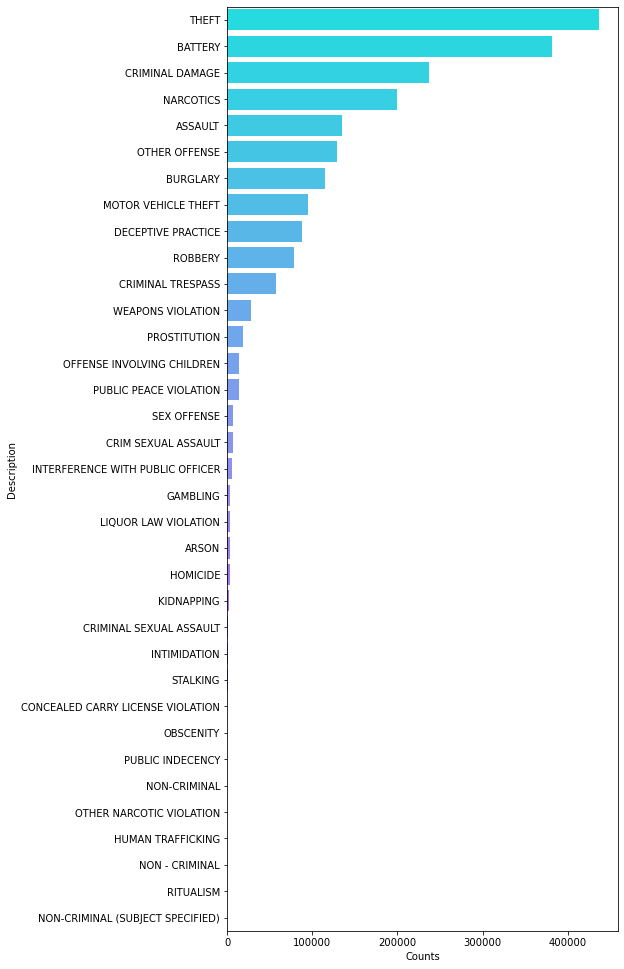

In [37]:
print('Theft is the most committed crime')
plt.figure(figsize=(7,17))
sns.barplot(y="Description", x= "Counts", data=Crimes_data, palette="cool")

In [38]:
crimeCount=data6['Primary Type'].value_counts()
crimeCount

THEFT                                436851
BATTERY                              381760
CRIMINAL DAMAGE                      237244
NARCOTICS                            199506
ASSAULT                              135223
OTHER OFFENSE                        128772
BURGLARY                             114981
MOTOR VEHICLE THEFT                   95269
DECEPTIVE PRACTICE                    87658
ROBBERY                               78447
CRIMINAL TRESPASS                     57954
WEAPONS VIOLATION                     28470
PROSTITUTION                          18260
OFFENSE INVOLVING CHILDREN            14430
PUBLIC PEACE VIOLATION                14396
SEX OFFENSE                            7534
CRIM SEXUAL ASSAULT                    7299
INTERFERENCE WITH PUBLIC OFFICER       5298
GAMBLING                               3991
LIQUOR LAW VIOLATION                   3839
ARSON                                  3500
HOMICIDE                               3438
KIDNAPPING                      

In [39]:
#Transforming non-numerical columns

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data7=data6
data7['Case Number']=le.fit_transform(data7['Case Number'])
data7['Date']=le.fit_transform(data7['Date'])
data7['Block']=le.fit_transform(data7['Block'])
data7['IUCR']=le.fit_transform(data7['IUCR'])
data7['Primary Type']=le.fit_transform(data7['Primary Type'])
data7['Description']=le.fit_transform(data7['Description'])
data7['Location Description']=le.fit_transform(data7['Location Description'])
data7['FBI Code']=le.fit_transform(data7['FBI Code'])
data7['Updated On']=le.fit_transform(data7['Updated On'])
data7['Location']=le.fit_transform(data7['Location'])
data7['Arrest']=le.fit_transform(data7['Arrest'])
data7['Domestic']=le.fit_transform(data7['Domestic'])
data7['Day']=le.fit_transform(data7['Day'])
data7['Month']=le.fit_transform(data7['Month'])
data7['Period']=le.fit_transform(data7['Period'])
data7['Violent Crime']=le.fit_transform(data7['Violent Crime'])


data7.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Month,Period,Violent Crime
0,445643,10358591,1593201,1211733,30704,156,6,460,171,0,...,1846011.0,2015,0,41.732605,-87.597451,56750,0,2,2,1
1,523977,10358892,1593278,1211708,28567,273,18,352,150,1,...,1856597.0,2015,0,41.761396,-87.557977,102939,0,2,3,0
2,669612,10359079,1593314,1211702,28378,88,33,1,17,0,...,1856789.0,2015,0,41.761969,-87.564820,104071,0,2,3,1
3,1580779,10358657,1593198,1211709,23287,51,2,189,145,0,...,1903023.0,2015,0,41.889997,-87.761813,276135,0,2,2,0
4,343550,10358915,1593283,1211719,26341,101,17,136,135,0,...,1942633.0,2015,0,41.998342,-87.694787,438620,0,2,3,0


In [41]:
data7.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Month,Period,Violent Crime
2070530,1939747,12578209,2033000,1210002,20338,125,9,221,145,0,...,1873582.0,2021,3619,41.809032,-87.728523,184077,0,2,3,0
2070531,162074,12576169,2032599,1210044,28748,94,33,127,75,0,...,1855104.0,2021,3619,41.757485,-87.586109,97006,0,2,2,1
2070532,1838213,12576044,2032581,1209996,25802,51,2,189,145,0,...,1862602.0,2021,3619,41.779082,-87.764211,136126,0,2,2,0
2070533,994941,12577810,2032923,1210007,3474,131,9,209,17,0,...,1903723.0,2021,3619,41.891880,-87.754264,279540,0,2,3,0
2070534,1194313,12576050,2032573,1209966,25537,88,33,1,17,0,...,1864490.0,2021,3619,41.783319,-87.597891,143949,0,2,2,1


In [42]:
#correlation

<AxesSubplot:>

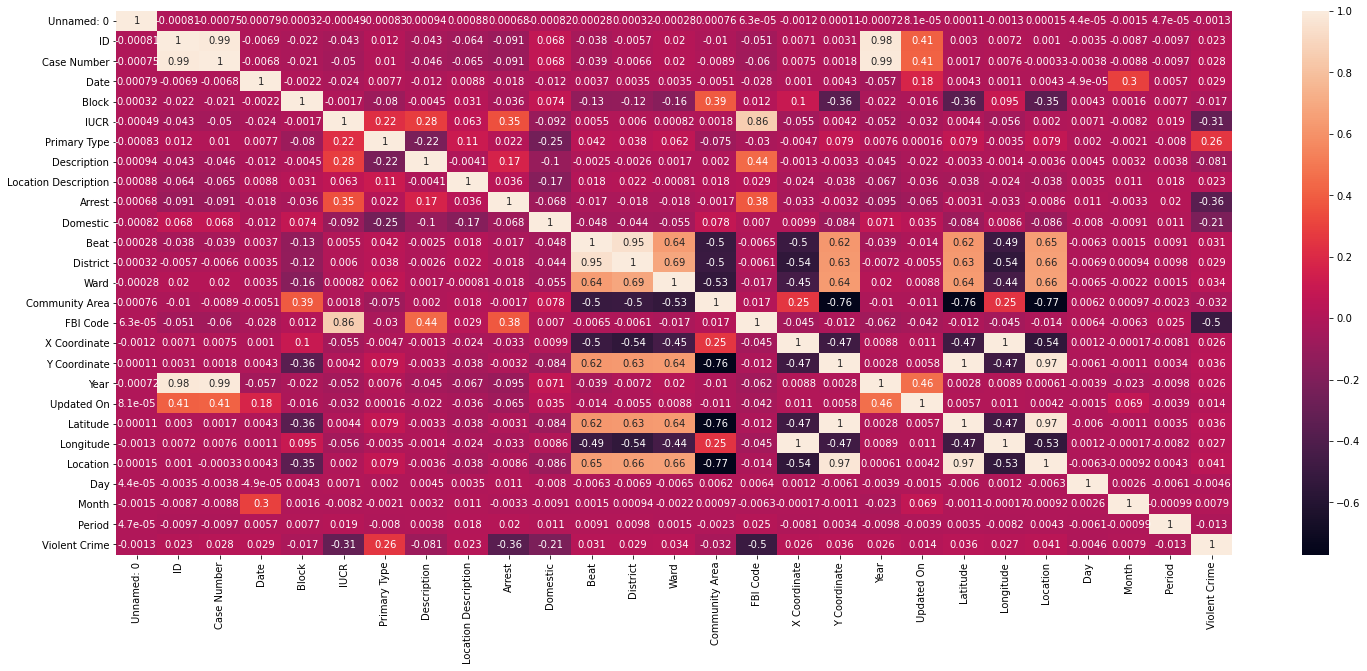

In [43]:
set_option('display.width',100)
plt.figure(figsize=(25,10))
sns.heatmap(data7.corr(),annot=True)

In [44]:
'''
*We can deduce the following from the correlation matrix;
*case number and ID have a very strong correlation of 0.99
*Beat and District have a very strong correlation of 0.94
*ID and Year have a strong correlation of 0.98
*Case Number and Year have a strong correlation of 0.99
*IUCR and FBI Code have a strong correlation of 0.86
*X coordinate and Longitude are have a strong correlation of 1
*Y coordinate and Latitude are have a stronq correlation of 1
'''

'\n*We can deduce the following from the correlation matrix;\n*case number and ID have a very strong correlation of 0.99\n*Beat and District have a very strong correlation of 0.94\n*ID and Year have a strong correlation of 0.98\n*Case Number and Year have a strong correlation of 0.99\n*IUCR and FBI Code have a strong correlation of 0.86\n*X coordinate and Longitude are have a strong correlation of 1\n*Y coordinate and Latitude are have a stronq correlation of 1\n'

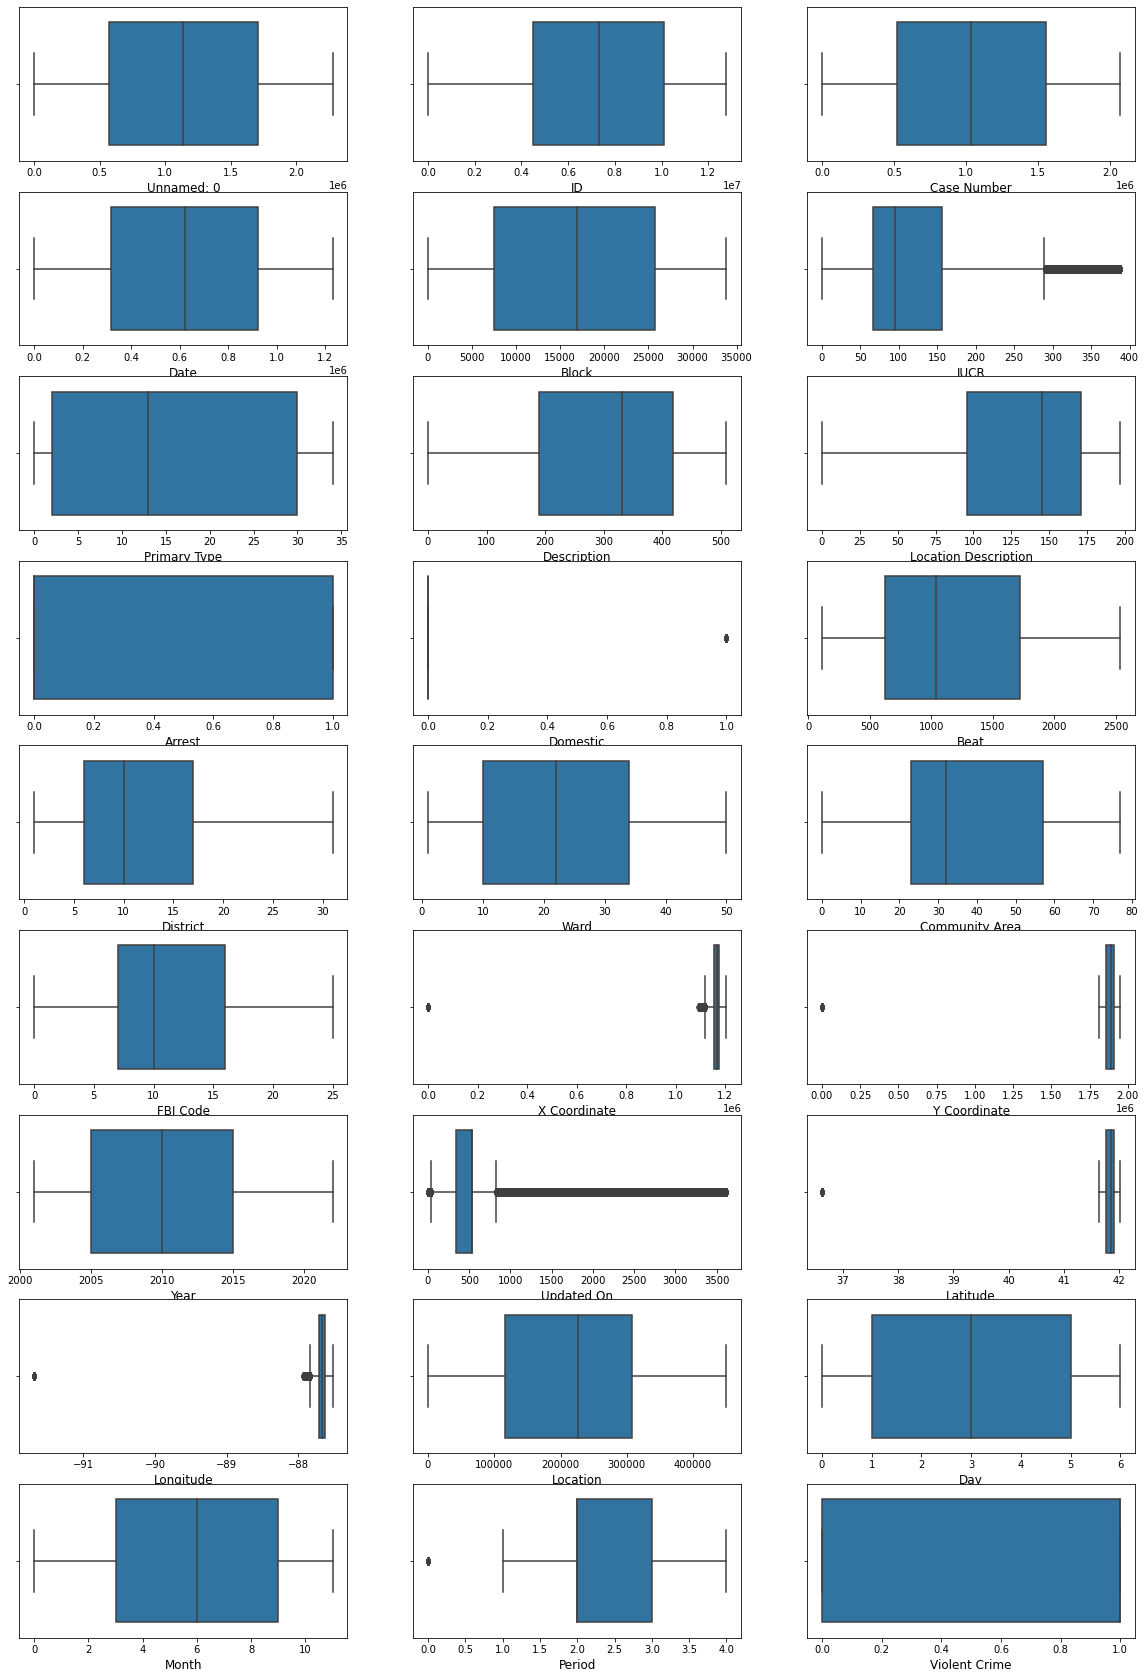

In [45]:
# Checking for outliers
plt.figure(figsize = (20, 30))
for i in range (len(data7.columns)):
    plt.subplot(9, 3, i+1)
    sns.boxplot(x=data7.iloc[:, i])
    plt.xlabel(data7.columns[i], size = 12)

In [46]:
#Dropping columns

In [47]:
'''
*The 'Unnamed: 0' column was dropped because it does not have any strong correlation with both the features and output 
variable, appears to be a serial number for the dataset
*The 'IUCR' column was also dropped because it does not possess any strong correlation with any of the output variables. 
It possesses a lot of outliers and the data stored in the IUCR is further explain in the 'Primary Type' and 'Description' 
columns
*The 'Updated On' column was dropped as well because it does not appear to be usefule anymore after using it to sort the
data, it also does not possess any strong correlation with any of the output variables and it also possesses a lot of 
outliers
*The 'Domestic' column was dropped because it does not possess any strong correlation with any of the features or output 
variables. The classified data is also encoded in other columns and it also possesses a lot of outliers which when removed
result in a offset in the data
'''
data8=data7.drop(['Unnamed: 0','Updated On','IUCR','Domestic'], axis=1)
print(data8.nunique())
print(data8.shape)
data8.head()

ID                      2070535
Case Number             2070535
Date                    1230170
Block                     33841
Primary Type                 35
Description                 511
Location Description        198
Arrest                        2
Beat                        303
District                     23
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              70173
Y Coordinate             117135
Year                         22
Latitude                 450183
Longitude                449993
Location                 450496
Day                           7
Month                        12
Period                        5
Violent Crime                 2
dtype: int64
(2070535, 23)


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime
0,10358591,1593201,1211733,30704,6,460,171,0,413,4.0,...,1185108.0,1846011.0,2015,41.732605,-87.597451,56750,0,2,2,1
1,10358892,1593278,1211708,28567,18,352,150,1,334,3.0,...,1195788.0,1856597.0,2015,41.761396,-87.557977,102939,0,2,3,0
2,10359079,1593314,1211702,28378,33,1,17,0,334,3.0,...,1193919.0,1856789.0,2015,41.761969,-87.564820,104071,0,2,3,1
3,10358657,1593198,1211709,23287,2,189,145,0,1523,15.0,...,1139864.0,1903023.0,2015,41.889997,-87.761813,276135,0,2,2,0
4,10358915,1593283,1211719,26341,17,136,135,0,2412,24.0,...,1157820.0,1942633.0,2015,41.998342,-87.694787,438620,0,2,3,0


In [48]:
# Removing outliers
def Outliers(data8, feature):
    IQ1 = data8[feature].quantile(0.25)
    IQ3 = data8[feature].quantile(0.75)
    IQR = IQ3 - IQ1
    
    lower_bound = IQ1 - 1.5 * IQR
    upper_bound = IQ3 + 1.5 * IQR
    
    index = data8.index[ (data8[feature] < lower_bound) | (data8[feature] > upper_bound) ]
    return index

In [49]:
# Getting index of all the outliers
index = []
for i in data8.columns:
    index.extend(Outliers(data8, i))
index = set(index)
print("Total number of outliers are {}".format(len(index)))

# Dropping all the outliers
data8.drop(index, inplace = True, axis = 0)
data8.shape

Total number of outliers are 321910


(1748625, 23)

The ratio of violent to non-violent crimes remained at the ratio of 0.88 after removing outliers
The ratio of arrests to no arrests remained at the ratio of 0.88 after removing outliers
All unknown day periods have also been removed from the dataframe


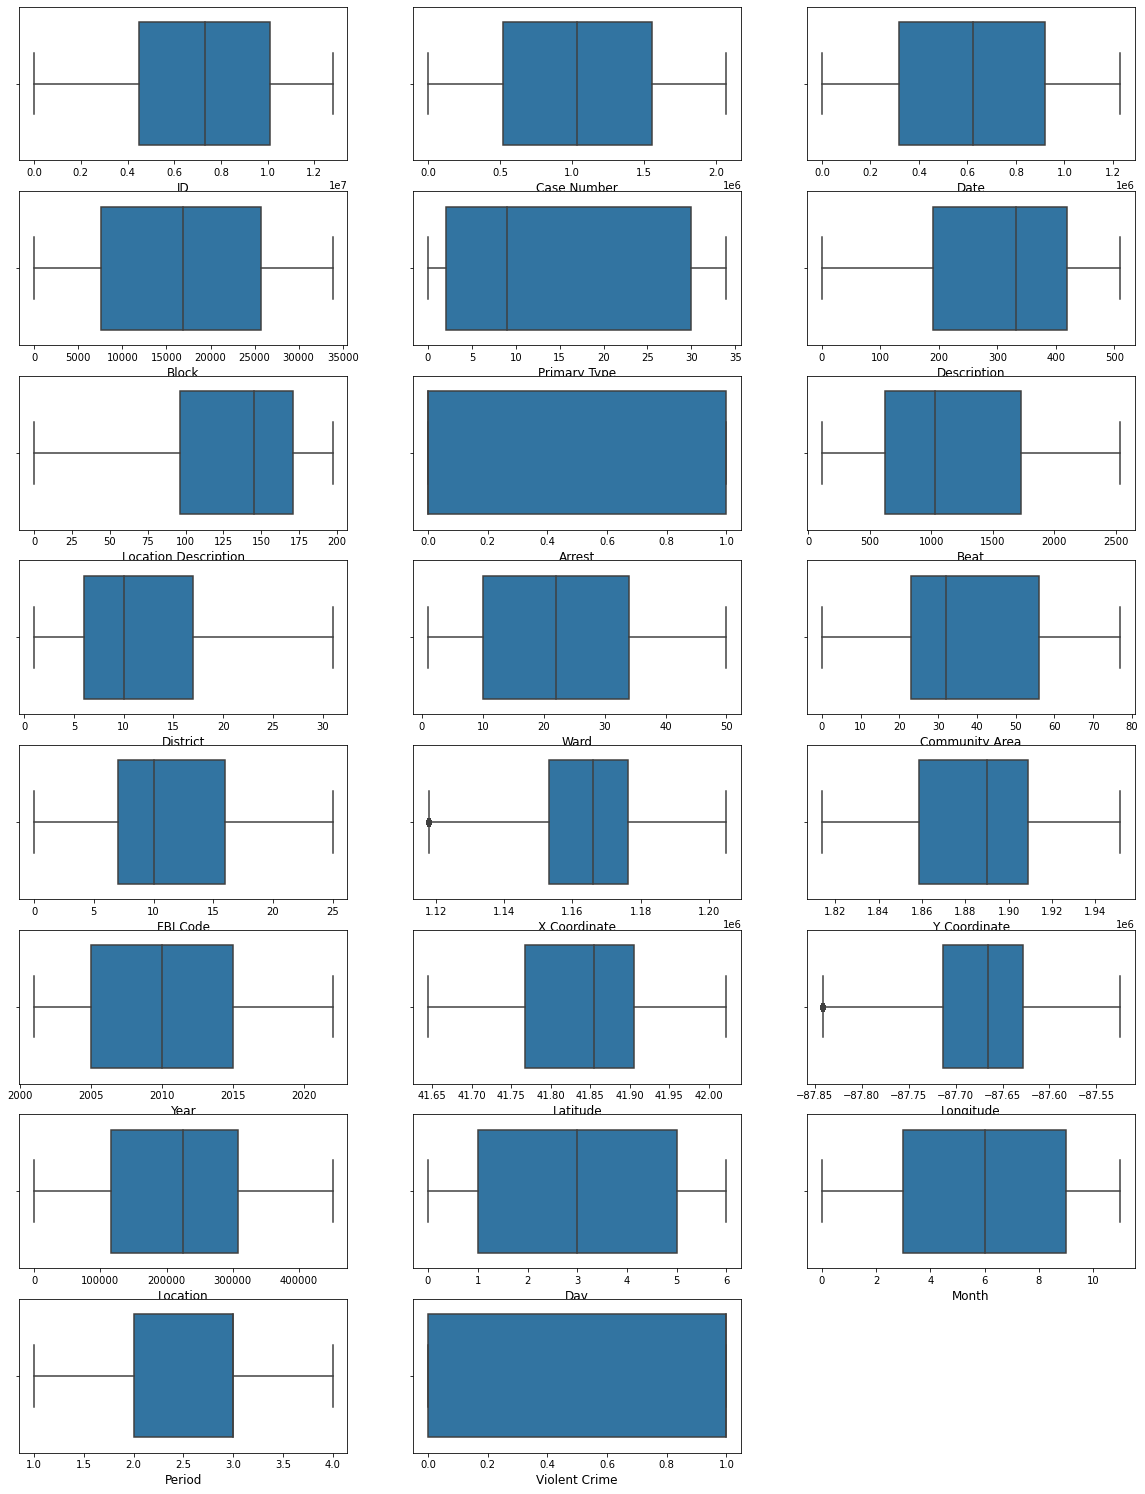

In [50]:
# Checking for outliers after dropping outliers
plt.figure(figsize = (20, 30))
for i in range (len(data8.columns)):
    plt.subplot(9, 3, i+1)
    sns.boxplot(x=data8.iloc[:, i])
    plt.xlabel(data8.columns[i], size = 12)
print('The ratio of violent to non-violent crimes remained at the ratio of 0.88 after removing outliers')
print('The ratio of arrests to no arrests remained at the ratio of 0.88 after removing outliers')
print('All unknown day periods have also been removed from the dataframe')

In [51]:
print('All unknown day periods have also been removed from the dataframe')
print('Period column values count')
data8['Period'].value_counts()

All unknown day periods have also been removed from the dataframe
Period column values count


3    779373
2    758893
4    106109
1    104250
Name: Period, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

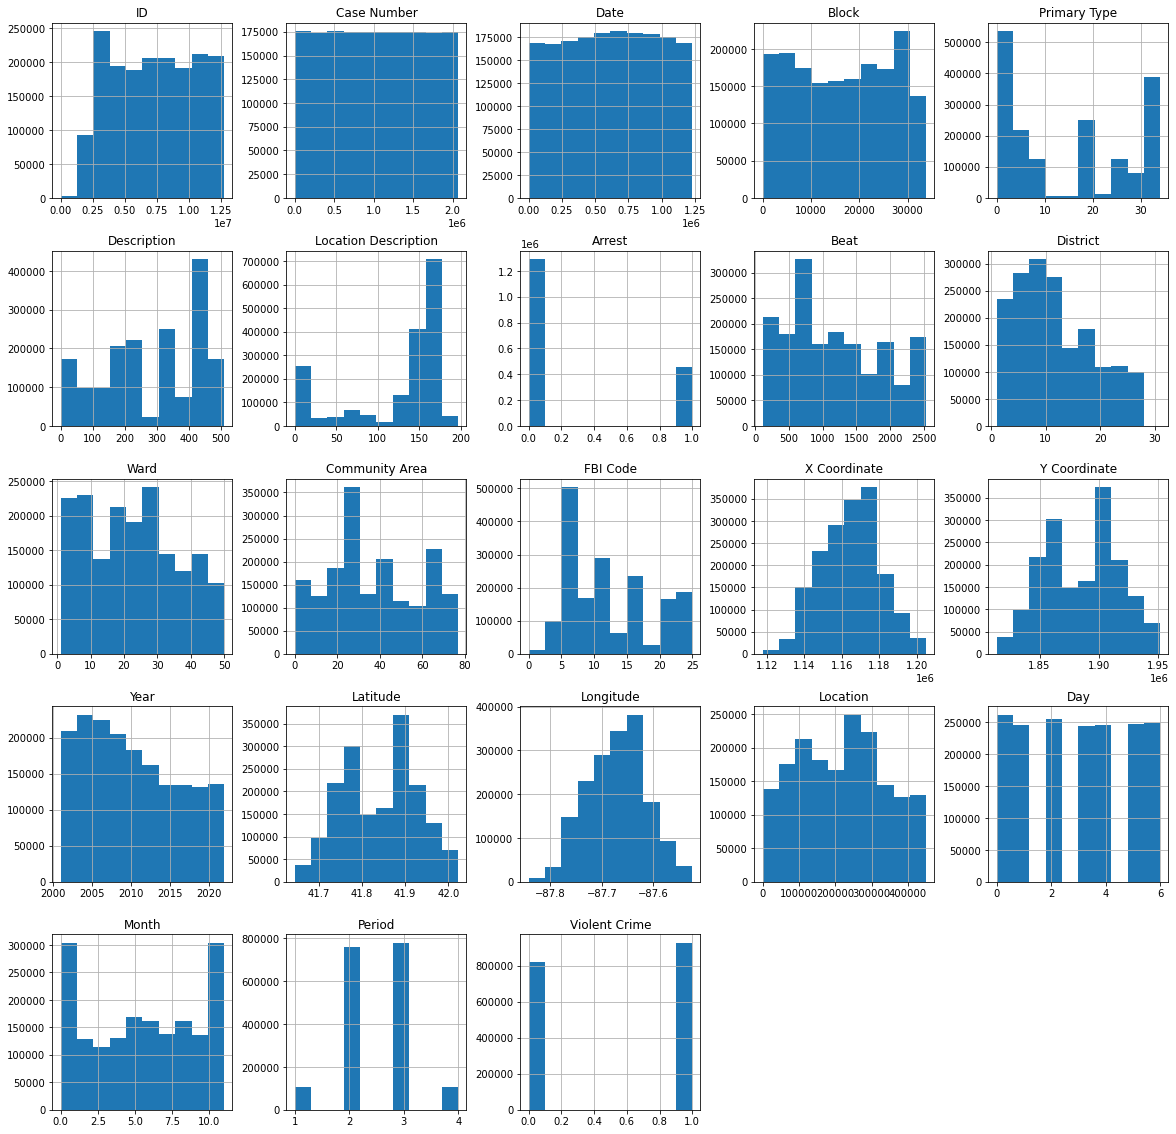

In [52]:
from matplotlib import pyplot

data8.hist()
plt.gcf().set_size_inches(20,20)
pyplot.show

In [53]:
data8.head()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime
0,10358591,1593201,1211733,30704,6,460,171,0,413,4.0,...,1185108.0,1846011.0,2015,41.732605,-87.597451,56750,0,2,2,1
1,10358892,1593278,1211708,28567,18,352,150,1,334,3.0,...,1195788.0,1856597.0,2015,41.761396,-87.557977,102939,0,2,3,0
2,10359079,1593314,1211702,28378,33,1,17,0,334,3.0,...,1193919.0,1856789.0,2015,41.761969,-87.564820,104071,0,2,3,1
3,10358657,1593198,1211709,23287,2,189,145,0,1523,15.0,...,1139864.0,1903023.0,2015,41.889997,-87.761813,276135,0,2,2,0
4,10358915,1593283,1211719,26341,17,136,135,0,2412,24.0,...,1157820.0,1942633.0,2015,41.998342,-87.694787,438620,0,2,3,0


In [54]:
data8.describe()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime
count,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,...,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06
mean,7.317545e+06,1.034332e+06,6.186973e+05,1.667295e+04,1.526806e+01,2.846158e+02,1.275549e+02,2.605298e-01,1.183155e+03,1.129001e+01,...,1.164807e+06,1.885457e+06,2.010357e+03,4.184129e+01,-8.767075e+01,2.180173e+05,2.974521e+00,5.593966e+00,2.507451e+00,5.306203e-01
std,3.180004e+06,5.979183e+05,3.514164e+05,9.914327e+03,1.250955e+01,1.510592e+02,5.618353e+01,4.389239e-01,7.012817e+02,6.935391e+00,...,1.575645e+04,3.136638e+04,5.701911e+00,8.625912e-02,5.732675e-02,1.204555e+05,2.010610e+00,3.454917e+00,7.003885e-01,4.990617e-01
min,6.460000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.110000e+02,1.000000e+00,...,1.117776e+06,1.813894e+06,2.001000e+03,4.164459e+01,-8.784240e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.503833e+06,5.171010e+05,3.180450e+05,7.610000e+03,2.000000e+00,1.890000e+02,9.600000e+01,0.000000e+00,6.210000e+02,6.000000e+00,...,1.153044e+06,1.858803e+06,2.005000e+03,4.176798e+01,-8.771349e+01,1.152600e+05,1.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00
50%,7.324567e+06,1.033125e+06,6.222070e+05,1.691300e+04,9.000000e+00,3.320000e+02,1.450000e+02,0.000000e+00,1.033000e+03,1.000000e+01,...,1.166069e+06,1.890241e+06,2.010000e+03,4.185458e+01,-8.766594e+01,2.247290e+05,3.000000e+00,6.000000e+00,3.000000e+00,1.000000e+00
75%,1.011685e+07,1.552219e+06,9.201520e+05,2.576600e+04,3.000000e+01,4.190000e+02,1.710000e+02,1.000000e+00,1.731000e+03,1.700000e+01,...,1.176362e+06,1.909013e+06,2.015000e+03,4.190617e+01,-8.762832e+01,3.072980e+05,5.000000e+00,9.000000e+00,3.000000e+00,1.000000e+00
max,1.278013e+07,2.070534e+06,1.230169e+06,3.384000e+04,3.400000e+01,5.100000e+02,1.970000e+02,1.000000e+00,2.535000e+03,3.100000e+01,...,1.205119e+06,1.951535e+06,2.022000e+03,4.202267e+01,-8.752453e+01,4.504950e+05,6.000000e+00,1.100000e+01,4.000000e+00,1.000000e+00


In [55]:
#Quesstion 1

In [56]:
#Data Preprocessing for Model 1(Model to predict crime type by day type and district)

In [57]:
data9=data8
data9=data9.reset_index()

In [58]:
data9=data9.drop(['index'], axis=1)
data9

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime
0,10358591,1593201,1211733,30704,6,460,171,0,413,4.0,...,1185108.0,1846011.0,2015,41.732605,-87.597451,56750,0,2,2,1
1,10358892,1593278,1211708,28567,18,352,150,1,334,3.0,...,1195788.0,1856597.0,2015,41.761396,-87.557977,102939,0,2,3,0
2,10359079,1593314,1211702,28378,33,1,17,0,334,3.0,...,1193919.0,1856789.0,2015,41.761969,-87.564820,104071,0,2,3,1
3,10358657,1593198,1211709,23287,2,189,145,0,1523,15.0,...,1139864.0,1903023.0,2015,41.889997,-87.761813,276135,0,2,2,0
4,10358915,1593283,1211719,26341,17,136,135,0,2412,24.0,...,1157820.0,1942633.0,2015,41.998342,-87.694787,438620,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748620,12578209,2033000,1210002,20338,9,221,145,0,815,8.0,...,1149136.0,1873582.0,2021,41.809032,-87.728523,184077,0,2,3,0
1748621,12576169,2032599,1210044,28748,33,127,75,0,411,4.0,...,1188125.0,1855104.0,2021,41.757485,-87.586109,97006,0,2,2,1
1748622,12576044,2032581,1209996,25802,2,189,145,0,812,8.0,...,1139479.0,1862602.0,2021,41.779082,-87.764211,136126,0,2,2,0
1748623,12577810,2032923,1210007,3474,9,209,17,0,1532,15.0,...,1141915.0,1903723.0,2021,41.891880,-87.754264,279540,0,2,3,0


In [59]:
'''
creating a new data set to focus on the prediction of Primary Type, Day and District
'''
data9['Primary Type_label']=data9['Primary Type']
data9['Day_label']=data9['Day']
data9['District_label']=data9['District']

data9

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,Latitude,Longitude,Location,Day,Month,Period,Violent Crime,Primary Type_label,Day_label,District_label
0,10358591,1593201,1211733,30704,6,460,171,0,413,4.0,...,41.732605,-87.597451,56750,0,2,2,1,6,0,4.0
1,10358892,1593278,1211708,28567,18,352,150,1,334,3.0,...,41.761396,-87.557977,102939,0,2,3,0,18,0,3.0
2,10359079,1593314,1211702,28378,33,1,17,0,334,3.0,...,41.761969,-87.564820,104071,0,2,3,1,33,0,3.0
3,10358657,1593198,1211709,23287,2,189,145,0,1523,15.0,...,41.889997,-87.761813,276135,0,2,2,0,2,0,15.0
4,10358915,1593283,1211719,26341,17,136,135,0,2412,24.0,...,41.998342,-87.694787,438620,0,2,3,0,17,0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748620,12578209,2033000,1210002,20338,9,221,145,0,815,8.0,...,41.809032,-87.728523,184077,0,2,3,0,9,0,8.0
1748621,12576169,2032599,1210044,28748,33,127,75,0,411,4.0,...,41.757485,-87.586109,97006,0,2,2,1,33,0,4.0
1748622,12576044,2032581,1209996,25802,2,189,145,0,812,8.0,...,41.779082,-87.764211,136126,0,2,2,0,2,0,8.0
1748623,12577810,2032923,1210007,3474,9,209,17,0,1532,15.0,...,41.891880,-87.754264,279540,0,2,3,0,9,0,15.0


In [60]:
data9=data9.drop(['Primary Type','Day','District'], axis=1)
data9

,ID,Case Number,Date,Block,Description,Location Description,Arrest,Beat,Ward,Community Area,...,Year,Latitude,Longitude,Location,Month,Period,Violent Crime,Primary Type_label,Day_label,District_label
0,10358591,1593201,1211733,30704,460,171,0,413,8.0,47.0,...,2015,41.732605,-87.597451,56750,2,2,1,6,0,4.0
1,10358892,1593278,1211708,28567,352,150,1,334,7.0,43.0,...,2015,41.761396,-87.557977,102939,2,3,0,18,0,3.0
2,10359079,1593314,1211702,28378,1,17,0,334,7.0,43.0,...,2015,41.761969,-87.564820,104071,2,3,1,33,0,3.0
3,10358657,1593198,1211709,23287,189,145,0,1523,37.0,25.0,...,2015,41.889997,-87.761813,276135,2,2,0,2,0,15.0
4,10358915,1593283,1211719,26341,136,135,0,2412,50.0,2.0,...,2015,41.998342,-87.694787,438620,2,3,0,17,0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748620,12578209,2033000,1210002,20338,221,145,0,815,14.0,57.0,...,2021,41.809032,-87.728523,184077,2,3,0,9,0,8.0
1748621,12576169,2032599,1210044,28748,127,75,0,411,8.0,43.0,...,2021,41.757485,-87.586109,97006,2,2,1,33,0,4.0
1748622,12576044,2032581,1209996,25802,189,145,0,812,13.0,64.0,...,2021,41.779082,-87.764211,136126,2,2,0,2,0,8.0
1748623,12577810,2032923,1210007,3474,209,17,0,1532,37.0,25.0,...,2021,41.891880,-87.754264,279540,2,3,0,9,0,15.0


In [61]:
data9.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'Description', 'Location Description', 'Arrest',
       'Beat', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year',
       'Latitude', 'Longitude', 'Location', 'Month', 'Period', 'Violent Crime',
       'Primary Type_label', 'Day_label', 'District_label'],
      dtype='object')

In [62]:
# Rescale data (between 0 and 1)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = data9.values
# separate array into input and output components
X = array[:,0:20]
Y = array[:,20:22]
demo = MinMaxScaler(feature_range=(0, 1))
rescaledX = demo.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)

print(rescaledX[0:5,:])

[[0.811 0.769 0.985 0.907 0.902 0.868 0.    0.125 0.143 0.61  0.64  0.771
  0.233 0.667 0.233 0.771 0.126 0.182 0.333 1.   ]
 [0.811 0.77  0.985 0.844 0.69  0.761 1.    0.092 0.122 0.558 0.8   0.893
  0.31  0.667 0.309 0.895 0.229 0.182 0.667 0.   ]
 [0.811 0.77  0.985 0.839 0.002 0.086 0.    0.092 0.122 0.558 0.28  0.872
  0.312 0.667 0.31  0.873 0.231 0.182 0.667 1.   ]
 [0.811 0.769 0.985 0.688 0.371 0.736 0.    0.583 0.735 0.325 0.4   0.253
  0.648 0.667 0.649 0.254 0.613 0.182 0.333 0.   ]
 [0.811 0.77  0.985 0.778 0.267 0.685 0.    0.949 1.    0.026 0.32  0.458
  0.935 0.667 0.936 0.464 0.974 0.182 0.667 0.   ]]


In [63]:
rescaledX_df = pd.DataFrame(rescaledX, columns = ['ID', 'Case Number', 'Date', 'Block', 'Description', 
                                                  'Location Description', 'Arrest',
       'Beat', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year',
       'Latitude', 'Longitude', 'Location', 'Month', 'Period', 'Violent Crime'])
print(rescaledX_df.shape)
rescaledX_df.head()

(1748625, 20)


,ID,Case Number,Date,Block,Description,Location Description,Arrest,Beat,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,Period,Violent Crime
0,0.810514,0.769464,0.985013,0.907329,0.901961,0.868020,0.0,0.124587,0.142857,0.610390,0.64,0.770892,0.233339,0.666667,0.232802,0.770592,0.125971,0.181818,0.333333,1.0
1,0.810537,0.769501,0.984993,0.844178,0.690196,0.761421,1.0,0.091997,0.122449,0.558442,0.80,0.893168,0.310249,0.666667,0.308953,0.894776,0.228500,0.181818,0.666667,0.0
2,0.810552,0.769518,0.984988,0.838593,0.001961,0.086294,0.0,0.091997,0.122449,0.558442,0.28,0.871770,0.311644,0.666667,0.310468,0.873246,0.231013,0.181818,0.666667,1.0
3,0.810519,0.769462,0.984994,0.688150,0.370588,0.736041,0.0,0.582508,0.734694,0.324675,0.40,0.252888,0.647547,0.666667,0.649089,0.253517,0.612958,0.181818,0.333333,0.0
4,0.810539,0.769503,0.985002,0.778398,0.266667,0.685279,0.0,0.949257,1.000000,0.025974,0.32,0.458468,0.935325,0.666667,0.935652,0.464379,0.973640,0.181818,0.666667,0.0


In [64]:
rescaledX_df['Primary Type_label'] = data9['Primary Type_label']
rescaledX_df['Day_label'] = data9['Day_label']
rescaledX_df['District_label'] = data9['District_label']

In [65]:
rescaledX_df.describe()

,ID,Case Number,Date,Block,Description,Location Description,Arrest,Beat,Ward,Community Area,...,Year,Latitude,Longitude,Location,Month,Period,Violent Crime,Primary Type_label,Day_label,District_label
count,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,...,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06
mean,5.725505e-01,4.995486e-01,5.029368e-01,4.926996e-01,5.580701e-01,6.474866e-01,2.605298e-01,4.423082e-01,4.414141e-01,4.849960e-01,...,4.455560e-01,5.202598e-01,5.399921e-01,4.839494e-01,5.085424e-01,5.024836e-01,5.306203e-01,1.526806e+01,2.974521e+00,1.129001e+01
std,2.488367e-01,2.887749e-01,2.856652e-01,2.929766e-01,2.961946e-01,2.851956e-01,4.389239e-01,2.893076e-01,2.813764e-01,2.784484e-01,...,2.715196e-01,2.281469e-01,1.803471e-01,2.673854e-01,3.140834e-01,2.334628e-01,4.990617e-01,1.250955e+01,2.010610e+00,6.935391e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.523763e-01,2.497428e-01,2.585376e-01,2.248818e-01,3.705882e-01,4.873096e-01,0.000000e+00,2.103960e-01,1.836735e-01,2.987013e-01,...,1.904762e-01,3.263600e-01,4.055401e-01,2.558502e-01,2.727273e-01,3.333333e-01,0.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00
50%,5.731000e-01,4.989655e-01,5.057899e-01,4.997931e-01,6.509804e-01,7.360406e-01,0.000000e+00,3.803630e-01,4.285714e-01,4.155844e-01,...,4.285714e-01,5.554113e-01,5.551225e-01,4.988479e-01,5.454545e-01,6.666667e-01,1.000000e+00,9.000000e+00,3.000000e+00,1.000000e+01
75%,7.915970e-01,7.496709e-01,7.479883e-01,7.614066e-01,8.215686e-01,8.680203e-01,1.000000e+00,6.683168e-01,6.734694e-01,7.272727e-01,...,6.666667e-01,6.918675e-01,6.734889e-01,6.821334e-01,8.181818e-01,6.666667e-01,1.000000e+00,3.000000e+01,5.000000e+00,1.700000e+01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.400000e+01,6.000000e+00,3.100000e+01


In [66]:
rescaledX_df

,ID,Case Number,Date,Block,Description,Location Description,Arrest,Beat,Ward,Community Area,...,Year,Latitude,Longitude,Location,Month,Period,Violent Crime,Primary Type_label,Day_label,District_label
0,0.810514,0.769464,0.985013,0.907329,0.901961,0.868020,0.0,0.124587,0.142857,0.610390,...,0.666667,0.232802,0.770592,0.125971,0.181818,0.333333,1.0,6,0,4.0
1,0.810537,0.769501,0.984993,0.844178,0.690196,0.761421,1.0,0.091997,0.122449,0.558442,...,0.666667,0.308953,0.894776,0.228500,0.181818,0.666667,0.0,18,0,3.0
2,0.810552,0.769518,0.984988,0.838593,0.001961,0.086294,0.0,0.091997,0.122449,0.558442,...,0.666667,0.310468,0.873246,0.231013,0.181818,0.666667,1.0,33,0,3.0
3,0.810519,0.769462,0.984994,0.688150,0.370588,0.736041,0.0,0.582508,0.734694,0.324675,...,0.666667,0.649089,0.253517,0.612958,0.181818,0.333333,0.0,2,0,15.0
4,0.810539,0.769503,0.985002,0.778398,0.266667,0.685279,0.0,0.949257,1.000000,0.025974,...,0.666667,0.935652,0.464379,0.973640,0.181818,0.666667,0.0,17,0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748620,0.984200,0.981872,0.983606,0.601005,0.433333,0.736041,0.0,0.290429,0.265306,0.740260,...,0.952381,0.434946,0.358245,0.408609,0.181818,0.666667,0.0,9,0,8.0
1748621,0.984040,0.981679,0.983640,0.849527,0.249020,0.380711,0.0,0.123762,0.142857,0.558442,...,0.952381,0.298609,0.806272,0.215330,0.181818,0.333333,1.0,33,0,4.0
1748622,0.984030,0.981670,0.983601,0.762470,0.370588,0.736041,0.0,0.289191,0.244898,0.831169,...,0.952381,0.355732,0.245975,0.302168,0.181818,0.333333,0.0,2,0,8.0
1748623,0.984169,0.981835,0.983610,0.102660,0.409804,0.086294,0.0,0.586221,0.734694,0.324675,...,0.952381,0.654070,0.277268,0.620517,0.181818,0.666667,0.0,9,0,15.0


In [67]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions

array = rescaledX_df.values
# separate array into input and output components
X = array[:,0:20]
Y = array[:,20:22]
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(standardX[0:5,:])

[[ 0.956  0.935  1.688  1.415  1.161  0.773 -0.594 -1.098 -1.061  0.45
   0.607  1.288 -1.258  0.814 -1.26   1.279 -1.339 -1.04  -0.725  0.941]
 [ 0.956  0.935  1.687  1.2    0.446  0.399  1.685 -1.211 -1.134  0.264
   1.222  1.966 -0.92   0.814 -0.926  1.967 -0.955 -1.04   0.703 -1.063]
 [ 0.956  0.935  1.687  1.181 -1.878 -1.968 -0.594 -1.211 -1.134  0.264
  -0.777  1.848 -0.914  0.814 -0.92   1.848 -0.946 -1.04   0.703  0.941]
 [ 0.956  0.935  1.687  0.667 -0.633  0.311 -0.594  0.485  1.042 -0.576
  -0.316 -1.583  0.56   0.814  0.565 -1.588  0.482 -1.04  -0.725 -1.063]
 [ 0.956  0.935  1.688  0.975 -0.984  0.133 -0.594  1.752  1.985 -1.648
  -0.623 -0.443  1.823  0.814  1.821 -0.419  1.831 -1.04   0.703 -1.063]]


In [68]:
standardX_df = pd.DataFrame(standardX, columns = ['ID', 'Case Number', 'Date', 'Block', 'Description', 
                                                  'Location Description', 'Arrest',
       'Beat', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year',
       'Latitude', 'Longitude', 'Location', 'Month', 'Period', 'Violent Crime'])
print(standardX_df.shape)
standardX_df.head()

(1748625, 20)


,ID,Case Number,Date,Block,Description,Location Description,Arrest,Beat,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,Period,Violent Crime
0,0.956303,0.934691,1.687559,1.415230,1.161030,0.773272,-0.593565,-1.098211,-1.061059,0.450330,0.606940,1.288443,-1.257603,0.814345,-1.259967,1.278643,-1.338813,-1.040247,-0.724528,0.940525
1,0.956398,0.934820,1.687488,1.199683,0.446078,0.399497,1.684735,-1.210862,-1.133589,0.263767,1.221943,1.966261,-0.920108,0.814345,-0.926187,1.967229,-0.955360,-1.040247,0.703252,-1.063236
2,0.956457,0.934880,1.687470,1.180620,-1.877514,-1.967746,-0.593565,-1.210862,-1.133589,0.263767,-0.776817,1.847643,-0.913987,0.814345,-0.919546,1.847849,-0.945962,-1.040247,0.703252,0.940525
3,0.956324,0.934686,1.687490,0.667120,-0.632969,0.310503,-0.593565,0.484605,1.042304,-0.575765,-0.315565,-1.583016,0.560012,0.814345,0.564677,-1.588467,0.482483,-1.040247,-0.724528,-1.063236
4,0.956405,0.934828,1.687519,0.975159,-0.983825,0.132515,-0.593565,1.752285,1.985191,-1.648500,-0.623066,-0.443419,1.822830,0.814345,1.820721,-0.419265,1.831404,-1.040247,0.703252,-1.063236


In [69]:
standardX_df['Primary Type_label'] = data9['Primary Type_label']
standardX_df['Day_label'] = data9['Day_label']
standardX_df['District_label'] = data9['District_label']

In [70]:
standardX_df.describe()

,ID,Case Number,Date,Block,Description,Location Description,Arrest,Beat,Ward,Community Area,...,Year,Latitude,Longitude,Location,Month,Period,Violent Crime,Primary Type_label,Day_label,District_label
count,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,...,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06
mean,-2.747490e-15,1.665579e-15,1.355242e-15,9.070476e-16,5.418338e-14,1.373428e-13,-6.457570e-14,-4.713139e-16,-4.880589e-16,-2.735438e-15,...,6.579299e-13,-3.228953e-17,-7.003634e-16,5.454859e-17,3.965192e-14,-3.119838e-15,7.884758e-14,1.526806e+01,2.974521e+00,1.129001e+01
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.250955e+01,2.010610e+00,6.935391e+00
min,-2.300909e+00,-1.729889e+00,-1.760582e+00,-1.681704e+00,-1.884134e+00,-2.270326e+00,-5.935652e-01,-1.528851e+00,-1.568768e+00,-1.741781e+00,...,-1.640972e+00,-2.280372e+00,-2.994183e+00,-1.809933e+00,-1.619132e+00,-2.152307e+00,-1.063236e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,-8.848142e-01,-8.650537e-01,-8.555445e-01,-9.141273e-01,-6.329689e-01,-5.616393e-01,-5.935652e-01,-8.016113e-01,-9.159998e-01,-6.690459e-01,...,-9.394530e-01,-8.498902e-01,-7.455179e-01,-8.530729e-01,-7.508043e-01,-7.245276e-01,-1.063236e+00,2.000000e+00,1.000000e+00,6.000000e+00
50%,2.208305e-03,-2.019168e-03,9.987242e-03,2.421201e-02,3.136798e-01,3.105027e-01,-5.935652e-01,-2.141154e-01,-4.564250e-02,-2.492800e-01,...,-6.255382e-02,1.540737e-01,8.389625e-02,5.571922e-02,1.175235e-01,7.032517e-01,9.405246e-01,9.000000e+00,3.000000e+00,1.000000e+01
75%,8.802827e-01,8.661498e-01,8.578277e-01,9.171624e-01,8.896130e-01,7.732719e-01,1.684735e+00,7.812053e-01,8.247148e-01,8.700957e-01,...,8.143454e-01,7.521805e-01,7.402220e-01,7.411924e-01,9.858514e-01,7.032517e-01,9.405246e-01,3.000000e+01,5.000000e+00,1.700000e+01
max,1.717792e+00,1.733016e+00,1.740021e+00,1.731540e+00,1.492026e+00,1.236041e+00,1.684735e+00,1.927678e+00,1.985191e+00,1.849549e+00,...,2.042004e+00,2.102769e+00,2.550682e+00,1.929988e+00,1.564737e+00,2.131031e+00,9.405246e-01,3.400000e+01,6.000000e+00,3.100000e+01


In [71]:
standardX_df.head()

,ID,Case Number,Date,Block,Description,Location Description,Arrest,Beat,Ward,Community Area,...,Year,Latitude,Longitude,Location,Month,Period,Violent Crime,Primary Type_label,Day_label,District_label
0,0.956303,0.934691,1.687559,1.415230,1.161030,0.773272,-0.593565,-1.098211,-1.061059,0.450330,...,0.814345,-1.259967,1.278643,-1.338813,-1.040247,-0.724528,0.940525,6,0,4.0
1,0.956398,0.934820,1.687488,1.199683,0.446078,0.399497,1.684735,-1.210862,-1.133589,0.263767,...,0.814345,-0.926187,1.967229,-0.955360,-1.040247,0.703252,-1.063236,18,0,3.0
2,0.956457,0.934880,1.687470,1.180620,-1.877514,-1.967746,-0.593565,-1.210862,-1.133589,0.263767,...,0.814345,-0.919546,1.847849,-0.945962,-1.040247,0.703252,0.940525,33,0,3.0
3,0.956324,0.934686,1.687490,0.667120,-0.632969,0.310503,-0.593565,0.484605,1.042304,-0.575765,...,0.814345,0.564677,-1.588467,0.482483,-1.040247,-0.724528,-1.063236,2,0,15.0
4,0.956405,0.934828,1.687519,0.975159,-0.983825,0.132515,-0.593565,1.752285,1.985191,-1.648500,...,0.814345,1.820721,-0.419265,1.831404,-1.040247,0.703252,-1.063236,17,0,24.0


In [72]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions
 
#array = standardX_df.values
# separate array into input and output components
array = standardX_df.values
X = array[:,0:20]
Y = array[:,20:22]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=5)
print(normalizedX[0:5,:])

[[ 0.19832  0.19384  0.34997  0.2935   0.24078  0.16036 -0.1231  -0.22775
  -0.22005  0.09339  0.12587  0.2672  -0.26081  0.16888 -0.2613   0.26517
  -0.27765 -0.21573 -0.15026  0.19505]
 [ 0.18301  0.17888  0.32291  0.22957  0.08536  0.07645  0.32238 -0.2317
  -0.21692  0.05047  0.23383  0.37625 -0.17607  0.15583 -0.17723  0.37644
  -0.18281 -0.19906  0.13457 -0.20346]
 [ 0.17541  0.17145  0.30947  0.21652 -0.34432 -0.36087 -0.10886 -0.22206
  -0.20789  0.04837 -0.14246  0.33885 -0.16762  0.14935 -0.16864  0.33888
  -0.17348 -0.19078  0.12897  0.17249]
 [ 0.23209  0.22684  0.40955  0.16191 -0.15362  0.07536 -0.14406  0.11761
   0.25296 -0.13974 -0.07659 -0.38419  0.13591  0.19764  0.13704 -0.38551
   0.1171  -0.25246 -0.17584 -0.25804]
 [ 0.1724   0.16851  0.30418  0.17578 -0.17734  0.02389 -0.10699  0.31586
   0.35784 -0.29715 -0.11231 -0.07993  0.32857  0.14679  0.32819 -0.07557
   0.33012 -0.18751  0.12676 -0.19165]]


In [73]:
normalizedX_df = pd.DataFrame(normalizedX, columns = ['ID', 'Case Number', 'Date', 'Block', 'Description', 
                                                  'Location Description', 'Arrest',
       'Beat', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year',
       'Latitude', 'Longitude', 'Location', 'Month', 'Period', 'Violent Crime'])
print(normalizedX_df.shape)
normalizedX_df.head()

(1748625, 20)


,ID,Case Number,Date,Block,Description,Location Description,Arrest,Beat,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,Period,Violent Crime
0,0.198321,0.193839,0.349972,0.293495,0.240778,0.160364,-0.123096,-0.227751,-0.220046,0.093391,0.125869,0.267202,-0.260806,0.168882,-0.261296,0.265169,-0.277647,-0.215730,-0.150255,0.195049
1,0.183012,0.178883,0.322909,0.229565,0.085359,0.076446,0.322383,-0.231705,-0.216918,0.050473,0.233825,0.376254,-0.176067,0.155829,-0.177231,0.376439,-0.182813,-0.199057,0.134571,-0.203456
2,0.175408,0.171451,0.309472,0.216519,-0.344325,-0.360873,-0.108856,-0.222065,-0.207893,0.048373,-0.142464,0.338847,-0.167620,0.149346,-0.168639,0.338884,-0.173484,-0.190775,0.128972,0.172487
3,0.232095,0.226844,0.409545,0.161907,-0.153618,0.075357,-0.144055,0.117611,0.252962,-0.139735,-0.076586,-0.384190,0.135912,0.197638,0.137044,-0.385513,0.117096,-0.252463,-0.175839,-0.258042
4,0.172397,0.168508,0.304184,0.175778,-0.177340,0.023886,-0.106993,0.315859,0.357841,-0.297151,-0.112311,-0.079929,0.328575,0.146790,0.328195,-0.075575,0.330121,-0.187510,0.126765,-0.191654


In [74]:
normalizedX_df.describe()

,ID,Case Number,Date,Block,Description,Location Description,Arrest,Beat,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,Period,Violent Crime
count,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06
mean,-1.014348e-03,-1.132078e-03,-1.883585e-03,-8.361696e-03,1.169815e-03,7.268044e-03,-5.115056e-03,-7.074002e-03,-7.855399e-03,2.967139e-03,-4.308357e-03,-6.086546e-03,3.104191e-04,-3.085001e-03,3.363821e-04,-6.113761e-03,-5.163356e-04,1.108149e-03,-1.860468e-04,2.206131e-03
std,2.215076e-01,2.212589e-01,2.312854e-01,2.262176e-01,2.322829e-01,2.266778e-01,2.308556e-01,2.169098e-01,2.216623e-01,2.276192e-01,2.278182e-01,2.179877e-01,2.114633e-01,2.201000e-01,2.114463e-01,2.181612e-01,2.110073e-01,2.316093e-01,2.261119e-01,2.368997e-01
min,-6.417262e-01,-5.575028e-01,-6.840814e-01,-6.393317e-01,-7.477822e-01,-7.645744e-01,-3.362800e-01,-5.416621e-01,-6.212438e-01,-4.781283e-01,-6.924415e-01,-5.713505e-01,-4.952904e-01,-5.851981e-01,-4.946194e-01,-5.781799e-01,-4.316516e-01,-6.559933e-01,-7.882721e-01,-5.837423e-01
25%,-2.055616e-01,-1.997855e-01,-1.912287e-01,-2.147228e-01,-1.665412e-01,-1.083200e-01,-1.470433e-01,-1.782921e-01,-1.959196e-01,-1.676753e-01,-1.784878e-01,-1.886454e-01,-1.943056e-01,-1.974813e-01,-1.945163e-01,-1.884640e-01,-1.944050e-01,-1.945740e-01,-1.712611e-01,-2.362632e-01
50%,5.292159e-04,-4.960782e-04,2.315961e-03,6.352075e-03,7.047483e-02,8.669199e-02,-1.261214e-01,-5.313950e-02,-1.143409e-02,-5.673586e-02,-7.942344e-02,1.890549e-02,4.237295e-02,-2.135741e-02,4.261751e-02,1.941837e-02,1.536629e-02,2.374569e-02,1.176893e-01,1.691661e-01
75%,2.033014e-01,2.002643e-01,1.904764e-01,2.020568e-01,2.105925e-01,1.673969e-01,2.917675e-01,1.740147e-01,1.656617e-01,2.205235e-01,1.634198e-01,1.632204e-01,1.778676e-01,1.862297e-01,1.780897e-01,1.635181e-01,1.747780e-01,1.960717e-01,1.670426e-01,2.178205e-01
max,4.743487e-01,4.922140e-01,6.499907e-01,4.223139e-01,5.737436e-01,5.269234e-01,7.061967e-01,6.215397e-01,4.971371e-01,5.567129e-01,7.568352e-01,5.176182e-01,4.225562e-01,5.631736e-01,4.223561e-01,5.179432e-01,4.485550e-01,6.285001e-01,7.797256e-01,5.328473e-01


In [75]:
#Creating new dataframes for analysis
PrimaryType_df=normalizedX_df.iloc[:,0:20]
PrimaryType_df['Primary Type_label'] = data9['Primary Type_label']

PrimaryType_df.head()



<ipython-input-75-14c30c962134>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PrimaryType_df['Primary Type_label'] = data9['Primary Type_label']


,ID,Case Number,Date,Block,Description,Location Description,Arrest,Beat,Ward,Community Area,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,Period,Violent Crime,Primary Type_label
0,0.198321,0.193839,0.349972,0.293495,0.240778,0.160364,-0.123096,-0.227751,-0.220046,0.093391,...,0.267202,-0.260806,0.168882,-0.261296,0.265169,-0.277647,-0.215730,-0.150255,0.195049,6
1,0.183012,0.178883,0.322909,0.229565,0.085359,0.076446,0.322383,-0.231705,-0.216918,0.050473,...,0.376254,-0.176067,0.155829,-0.177231,0.376439,-0.182813,-0.199057,0.134571,-0.203456,18
2,0.175408,0.171451,0.309472,0.216519,-0.344325,-0.360873,-0.108856,-0.222065,-0.207893,0.048373,...,0.338847,-0.167620,0.149346,-0.168639,0.338884,-0.173484,-0.190775,0.128972,0.172487,33
3,0.232095,0.226844,0.409545,0.161907,-0.153618,0.075357,-0.144055,0.117611,0.252962,-0.139735,...,-0.384190,0.135912,0.197638,0.137044,-0.385513,0.117096,-0.252463,-0.175839,-0.258042,2
4,0.172397,0.168508,0.304184,0.175778,-0.177340,0.023886,-0.106993,0.315859,0.357841,-0.297151,...,-0.079929,0.328575,0.146790,0.328195,-0.075575,0.330121,-0.187510,0.126765,-0.191654,17


In [76]:
Day_df=normalizedX_df.iloc[:,0:20]
Day_df['Day_label'] = data9['Day_label']
Day_df.head()

<ipython-input-76-5a44b61944b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Day_df['Day_label'] = data9['Day_label']


,ID,Case Number,Date,Block,Description,Location Description,Arrest,Beat,Ward,Community Area,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,Period,Violent Crime,Day_label
0,0.198321,0.193839,0.349972,0.293495,0.240778,0.160364,-0.123096,-0.227751,-0.220046,0.093391,...,0.267202,-0.260806,0.168882,-0.261296,0.265169,-0.277647,-0.215730,-0.150255,0.195049,0
1,0.183012,0.178883,0.322909,0.229565,0.085359,0.076446,0.322383,-0.231705,-0.216918,0.050473,...,0.376254,-0.176067,0.155829,-0.177231,0.376439,-0.182813,-0.199057,0.134571,-0.203456,0
2,0.175408,0.171451,0.309472,0.216519,-0.344325,-0.360873,-0.108856,-0.222065,-0.207893,0.048373,...,0.338847,-0.167620,0.149346,-0.168639,0.338884,-0.173484,-0.190775,0.128972,0.172487,0
3,0.232095,0.226844,0.409545,0.161907,-0.153618,0.075357,-0.144055,0.117611,0.252962,-0.139735,...,-0.384190,0.135912,0.197638,0.137044,-0.385513,0.117096,-0.252463,-0.175839,-0.258042,0
4,0.172397,0.168508,0.304184,0.175778,-0.177340,0.023886,-0.106993,0.315859,0.357841,-0.297151,...,-0.079929,0.328575,0.146790,0.328195,-0.075575,0.330121,-0.187510,0.126765,-0.191654,0


In [77]:
District_df=normalizedX_df.iloc[:,0:20]
District_df['District_label'] = data9['District_label']
District_df.head()

<ipython-input-77-5a68085fb515>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  District_df['District_label'] = data9['District_label']


,ID,Case Number,Date,Block,Description,Location Description,Arrest,Beat,Ward,Community Area,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,Period,Violent Crime,District_label
0,0.198321,0.193839,0.349972,0.293495,0.240778,0.160364,-0.123096,-0.227751,-0.220046,0.093391,...,0.267202,-0.260806,0.168882,-0.261296,0.265169,-0.277647,-0.215730,-0.150255,0.195049,4.0
1,0.183012,0.178883,0.322909,0.229565,0.085359,0.076446,0.322383,-0.231705,-0.216918,0.050473,...,0.376254,-0.176067,0.155829,-0.177231,0.376439,-0.182813,-0.199057,0.134571,-0.203456,3.0
2,0.175408,0.171451,0.309472,0.216519,-0.344325,-0.360873,-0.108856,-0.222065,-0.207893,0.048373,...,0.338847,-0.167620,0.149346,-0.168639,0.338884,-0.173484,-0.190775,0.128972,0.172487,3.0
3,0.232095,0.226844,0.409545,0.161907,-0.153618,0.075357,-0.144055,0.117611,0.252962,-0.139735,...,-0.384190,0.135912,0.197638,0.137044,-0.385513,0.117096,-0.252463,-0.175839,-0.258042,15.0
4,0.172397,0.168508,0.304184,0.175778,-0.177340,0.023886,-0.106993,0.315859,0.357841,-0.297151,...,-0.079929,0.328575,0.146790,0.328195,-0.075575,0.330121,-0.187510,0.126765,-0.191654,24.0


In [78]:
# Feature Importance with Extra Trees Classifier to select the 5 most important features 
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

i=0
dflist = [PrimaryType_df,Day_df,District_df]
description=['PrimaryType label feature selection','Day label feature selection','District label feature selection']
for df in dflist:
    array = df.values
    X = array[:,0:20]
    Y = array[:,20]
    # feature extraction
    model = ExtraTreesClassifier(5)
    model.fit(X, Y)
    print(description[i])
    print(model.feature_importances_)
    i=i+1

PrimaryType label feature selection
[0.00921 0.00879 0.0062  0.00917 0.18795 0.0311  0.07353 0.01368 0.01156
 0.01283 0.37252 0.01117 0.00924 0.00891 0.01027 0.01017 0.01148 0.00611
 0.00944 0.18668]
Day label feature selection
[0.05055 0.05055 0.05504 0.0511  0.05191 0.05274 0.04714 0.0469  0.04732
 0.04724 0.04992 0.05112 0.04928 0.04954 0.04936 0.05118 0.04942 0.05285
 0.04942 0.04743]
District label feature selection
[0.00248 0.00228 0.00139 0.03558 0.00255 0.00859 0.01558 0.20336 0.06072
 0.09024 0.00211 0.11814 0.07185 0.00247 0.08373 0.1255  0.15219 0.00165
 0.00334 0.01626]


In [79]:
#Dropping less important columns 

In [80]:
PrimaryType_df=PrimaryType_df.drop(['ID', 'Case Number', 'Date', 'Block',
       'Beat', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year',
       'Latitude', 'Longitude', 'Location', 'Month', 'Period'], axis=1)
Day_df=Day_df.drop(['ID', 'Case Number', 'Arrest','Beat', 'Ward', 'Community Area', 
                    'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year',
       'Latitude', 'Longitude', 'Location', 'Period', 'Violent Crime'], axis=1)
District_df=District_df.drop(['ID', 'Case Number', 'Date', 'Block', 'Description', 'Location Description', 'Arrest',
            'Ward', 'Community Area', 'FBI Code', 'Y Coordinate', 'Year', 'Month', 'Period', 'Violent Crime'], axis=1)
PrimaryType_df.head()

,Description,Location Description,Arrest,FBI Code,Violent Crime,Primary Type_label
0,0.240778,0.160364,-0.123096,0.125869,0.195049,6
1,0.085359,0.076446,0.322383,0.233825,-0.203456,18
2,-0.344325,-0.360873,-0.108856,-0.142464,0.172487,33
3,-0.153618,0.075357,-0.144055,-0.076586,-0.258042,2
4,-0.177340,0.023886,-0.106993,-0.112311,-0.191654,17


In [81]:
Day_df.head()

,Date,Block,Description,Location Description,Month,Day_label
0,0.349972,0.293495,0.240778,0.160364,-0.215730,0
1,0.322909,0.229565,0.085359,0.076446,-0.199057,0
2,0.309472,0.216519,-0.344325,-0.360873,-0.190775,0
3,0.409545,0.161907,-0.153618,0.075357,-0.252463,0
4,0.304184,0.175778,-0.177340,0.023886,-0.187510,0


In [82]:
District_df.head()

,Beat,X Coordinate,Latitude,Longitude,Location,District_label
0,-0.227751,0.267202,-0.261296,0.265169,-0.277647,4.0
1,-0.231705,0.376254,-0.177231,0.376439,-0.182813,3.0
2,-0.222065,0.338847,-0.168639,0.338884,-0.173484,3.0
3,0.117611,-0.384190,0.137044,-0.385513,0.117096,15.0
4,0.315859,-0.079929,0.328195,-0.075575,0.330121,24.0


In [83]:
#Model 1

In [84]:
# Regression models(Decision Tree Regression and Ridge Regression were used  given that they gave the highest 
# accuracy values while testing other modelling techniques)
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

i=0
dflist = [PrimaryType_df,Day_df,District_df]
description=['PrimaryType label MSE','Day label MSE','District label MSE']
predModel=[DecisionTreeRegressor(),Ridge(),Ridge()]
for df in dflist:
    array = df.values
    X = array[:,0:5]
    Y = array[:,5]
    kfold = KFold(n_splits=10, random_state=None)
    model = predModel[i]
    scoring = 'neg_mean_squared_error'
    results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    print(description[i])
    print(results.mean())
    i=i+1

PrimaryType label MSE
-0.21750304093820927
Day label MSE
-4.042402571580112
District label MSE
-5.502889792033616


In [85]:
#Question2
#Data Preprocessing for Model 2 (Model to predict violent and non-violent crimes by day period and ward)

In [86]:
data10=data8
data10=data10.reset_index()

In [87]:
data10=data10.drop(['index'], axis=1)
data10

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime
0,10358591,1593201,1211733,30704,6,460,171,0,413,4.0,...,1185108.0,1846011.0,2015,41.732605,-87.597451,56750,0,2,2,1
1,10358892,1593278,1211708,28567,18,352,150,1,334,3.0,...,1195788.0,1856597.0,2015,41.761396,-87.557977,102939,0,2,3,0
2,10359079,1593314,1211702,28378,33,1,17,0,334,3.0,...,1193919.0,1856789.0,2015,41.761969,-87.564820,104071,0,2,3,1
3,10358657,1593198,1211709,23287,2,189,145,0,1523,15.0,...,1139864.0,1903023.0,2015,41.889997,-87.761813,276135,0,2,2,0
4,10358915,1593283,1211719,26341,17,136,135,0,2412,24.0,...,1157820.0,1942633.0,2015,41.998342,-87.694787,438620,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748620,12578209,2033000,1210002,20338,9,221,145,0,815,8.0,...,1149136.0,1873582.0,2021,41.809032,-87.728523,184077,0,2,3,0
1748621,12576169,2032599,1210044,28748,33,127,75,0,411,4.0,...,1188125.0,1855104.0,2021,41.757485,-87.586109,97006,0,2,2,1
1748622,12576044,2032581,1209996,25802,2,189,145,0,812,8.0,...,1139479.0,1862602.0,2021,41.779082,-87.764211,136126,0,2,2,0
1748623,12577810,2032923,1210007,3474,9,209,17,0,1532,15.0,...,1141915.0,1903723.0,2021,41.891880,-87.754264,279540,0,2,3,0


In [88]:
data10.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'Location', 'Day', 'Month', 'Period',
       'Violent Crime'],
      dtype='object')

In [89]:
'''
creating a new data set to focus on the prediction of violent and non-violent crimes, day period and ward
'''
data10['Violent Crime_label']=data10['Violent Crime']
data10['Period_label']=data10['Period']
data10['Ward_label']=data10['Ward']

data10

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,Latitude,Longitude,Location,Day,Month,Period,Violent Crime,Violent Crime_label,Period_label,Ward_label
0,10358591,1593201,1211733,30704,6,460,171,0,413,4.0,...,41.732605,-87.597451,56750,0,2,2,1,1,2,8.0
1,10358892,1593278,1211708,28567,18,352,150,1,334,3.0,...,41.761396,-87.557977,102939,0,2,3,0,0,3,7.0
2,10359079,1593314,1211702,28378,33,1,17,0,334,3.0,...,41.761969,-87.564820,104071,0,2,3,1,1,3,7.0
3,10358657,1593198,1211709,23287,2,189,145,0,1523,15.0,...,41.889997,-87.761813,276135,0,2,2,0,0,2,37.0
4,10358915,1593283,1211719,26341,17,136,135,0,2412,24.0,...,41.998342,-87.694787,438620,0,2,3,0,0,3,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748620,12578209,2033000,1210002,20338,9,221,145,0,815,8.0,...,41.809032,-87.728523,184077,0,2,3,0,0,3,14.0
1748621,12576169,2032599,1210044,28748,33,127,75,0,411,4.0,...,41.757485,-87.586109,97006,0,2,2,1,1,2,8.0
1748622,12576044,2032581,1209996,25802,2,189,145,0,812,8.0,...,41.779082,-87.764211,136126,0,2,2,0,0,2,13.0
1748623,12577810,2032923,1210007,3474,9,209,17,0,1532,15.0,...,41.891880,-87.754264,279540,0,2,3,0,0,3,37.0


In [90]:
data10=data10.drop(['Violent Crime','Period','Ward'], axis=1)
data10

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Violent Crime_label,Period_label,Ward_label
0,10358591,1593201,1211733,30704,6,460,171,0,413,4.0,...,1846011.0,2015,41.732605,-87.597451,56750,0,2,1,2,8.0
1,10358892,1593278,1211708,28567,18,352,150,1,334,3.0,...,1856597.0,2015,41.761396,-87.557977,102939,0,2,0,3,7.0
2,10359079,1593314,1211702,28378,33,1,17,0,334,3.0,...,1856789.0,2015,41.761969,-87.564820,104071,0,2,1,3,7.0
3,10358657,1593198,1211709,23287,2,189,145,0,1523,15.0,...,1903023.0,2015,41.889997,-87.761813,276135,0,2,0,2,37.0
4,10358915,1593283,1211719,26341,17,136,135,0,2412,24.0,...,1942633.0,2015,41.998342,-87.694787,438620,0,2,0,3,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748620,12578209,2033000,1210002,20338,9,221,145,0,815,8.0,...,1873582.0,2021,41.809032,-87.728523,184077,0,2,0,3,14.0
1748621,12576169,2032599,1210044,28748,33,127,75,0,411,4.0,...,1855104.0,2021,41.757485,-87.586109,97006,0,2,1,2,8.0
1748622,12576044,2032581,1209996,25802,2,189,145,0,812,8.0,...,1862602.0,2021,41.779082,-87.764211,136126,0,2,0,2,13.0
1748623,12577810,2032923,1210007,3474,9,209,17,0,1532,15.0,...,1903723.0,2021,41.891880,-87.754264,279540,0,2,0,3,37.0


In [91]:
data10.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Beat', 'District', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Latitude', 'Longitude', 'Location', 'Day', 'Month', 'Violent Crime_label',
       'Period_label', 'Ward_label'],
      dtype='object')

In [92]:
# Rescale data (between 0 and 1)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = data10.values
# separate array into input and output components
X = array[:,0:20]
Y = array[:,20:22]
demo = MinMaxScaler(feature_range=(0, 1))
rescaledX2 = demo.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)

print(rescaledX2[0:5,:])

[[0.811 0.769 0.985 0.907 0.176 0.902 0.868 0.    0.125 0.1   0.61  0.64
  0.771 0.233 0.667 0.233 0.771 0.126 0.    0.182]
 [0.811 0.77  0.985 0.844 0.529 0.69  0.761 1.    0.092 0.067 0.558 0.8
  0.893 0.31  0.667 0.309 0.895 0.229 0.    0.182]
 [0.811 0.77  0.985 0.839 0.971 0.002 0.086 0.    0.092 0.067 0.558 0.28
  0.872 0.312 0.667 0.31  0.873 0.231 0.    0.182]
 [0.811 0.769 0.985 0.688 0.059 0.371 0.736 0.    0.583 0.467 0.325 0.4
  0.253 0.648 0.667 0.649 0.254 0.613 0.    0.182]
 [0.811 0.77  0.985 0.778 0.5   0.267 0.685 0.    0.949 0.767 0.026 0.32
  0.458 0.935 0.667 0.936 0.464 0.974 0.    0.182]]


In [93]:
rescaledX2_df = pd.DataFrame(rescaledX2, columns = ['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description', 
                                                    'Location Description',
       'Arrest', 'Beat', 'District', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Latitude', 'Longitude', 'Location', 'Day', 'Month'])
print(rescaledX2_df.shape)
rescaledX2_df.head()

(1748625, 20)


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month
0,0.810514,0.769464,0.985013,0.907329,0.176471,0.901961,0.868020,0.0,0.124587,0.100000,0.610390,0.64,0.770892,0.233339,0.666667,0.232802,0.770592,0.125971,0.0,0.181818
1,0.810537,0.769501,0.984993,0.844178,0.529412,0.690196,0.761421,1.0,0.091997,0.066667,0.558442,0.80,0.893168,0.310249,0.666667,0.308953,0.894776,0.228500,0.0,0.181818
2,0.810552,0.769518,0.984988,0.838593,0.970588,0.001961,0.086294,0.0,0.091997,0.066667,0.558442,0.28,0.871770,0.311644,0.666667,0.310468,0.873246,0.231013,0.0,0.181818
3,0.810519,0.769462,0.984994,0.688150,0.058824,0.370588,0.736041,0.0,0.582508,0.466667,0.324675,0.40,0.252888,0.647547,0.666667,0.649089,0.253517,0.612958,0.0,0.181818
4,0.810539,0.769503,0.985002,0.778398,0.500000,0.266667,0.685279,0.0,0.949257,0.766667,0.025974,0.32,0.458468,0.935325,0.666667,0.935652,0.464379,0.973640,0.0,0.181818


In [94]:
rescaledX2_df['Violent Crime_label'] = data10['Violent Crime_label']
rescaledX2_df['Period_label'] = data10['Period_label']
rescaledX2_df['Ward_label'] = data10['Ward_label']

In [95]:
rescaledX2_df.describe()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Violent Crime_label,Period_label,Ward_label
count,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,...,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06
mean,5.725505e-01,4.995486e-01,5.029368e-01,4.926996e-01,4.490606e-01,5.580701e-01,6.474866e-01,2.605298e-01,4.423082e-01,3.430004e-01,...,5.199283e-01,4.455560e-01,5.202598e-01,5.399921e-01,4.839494e-01,4.957534e-01,5.085424e-01,5.306203e-01,2.507451e+00,2.262929e+01
std,2.488367e-01,2.887749e-01,2.856652e-01,2.929766e-01,3.679281e-01,2.961946e-01,2.851956e-01,4.389239e-01,2.893076e-01,2.311797e-01,...,2.278854e-01,2.715196e-01,2.281469e-01,1.803471e-01,2.673854e-01,3.351016e-01,3.140834e-01,4.990617e-01,7.003885e-01,1.378745e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,3.523763e-01,2.497428e-01,2.585376e-01,2.248818e-01,5.882353e-02,3.705882e-01,4.873096e-01,0.000000e+00,2.103960e-01,1.666667e-01,...,3.262763e-01,1.904762e-01,3.263600e-01,4.055401e-01,2.558502e-01,1.666667e-01,2.727273e-01,0.000000e+00,2.000000e+00,1.000000e+01
50%,5.731000e-01,4.989655e-01,5.057899e-01,4.997931e-01,2.647059e-01,6.509804e-01,7.360406e-01,0.000000e+00,3.803630e-01,3.000000e-01,...,5.546821e-01,4.285714e-01,5.554113e-01,5.551225e-01,4.988479e-01,5.000000e-01,5.454545e-01,1.000000e+00,3.000000e+00,2.200000e+01
75%,7.915970e-01,7.496709e-01,7.479883e-01,7.614066e-01,8.823529e-01,8.215686e-01,8.680203e-01,1.000000e+00,6.683168e-01,5.333333e-01,...,6.910659e-01,6.666667e-01,6.918675e-01,6.734889e-01,6.821334e-01,8.333333e-01,8.181818e-01,1.000000e+00,3.000000e+00,3.400000e+01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,5.000000e+01


In [96]:
rescaledX2_df.head()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Violent Crime_label,Period_label,Ward_label
0,0.810514,0.769464,0.985013,0.907329,0.176471,0.901961,0.868020,0.0,0.124587,0.100000,...,0.233339,0.666667,0.232802,0.770592,0.125971,0.0,0.181818,1,2,8.0
1,0.810537,0.769501,0.984993,0.844178,0.529412,0.690196,0.761421,1.0,0.091997,0.066667,...,0.310249,0.666667,0.308953,0.894776,0.228500,0.0,0.181818,0,3,7.0
2,0.810552,0.769518,0.984988,0.838593,0.970588,0.001961,0.086294,0.0,0.091997,0.066667,...,0.311644,0.666667,0.310468,0.873246,0.231013,0.0,0.181818,1,3,7.0
3,0.810519,0.769462,0.984994,0.688150,0.058824,0.370588,0.736041,0.0,0.582508,0.466667,...,0.647547,0.666667,0.649089,0.253517,0.612958,0.0,0.181818,0,2,37.0
4,0.810539,0.769503,0.985002,0.778398,0.500000,0.266667,0.685279,0.0,0.949257,0.766667,...,0.935325,0.666667,0.935652,0.464379,0.973640,0.0,0.181818,0,3,50.0


In [97]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions

array = rescaledX2_df.values
# separate array into input and output components
X = array[:,0:20]
Y = array[:,20:22]
scaler = StandardScaler().fit(X)
standardX2 = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(standardX2[0:5,:])

[[ 0.956  0.935  1.688  1.415 -0.741  1.161  0.773 -0.594 -1.098 -1.051
   0.45   0.607  1.288 -1.258  0.814 -1.26   1.279 -1.339 -1.479 -1.04 ]
 [ 0.956  0.935  1.687  1.2    0.218  0.446  0.399  1.685 -1.211 -1.195
   0.264  1.222  1.966 -0.92   0.814 -0.926  1.967 -0.955 -1.479 -1.04 ]
 [ 0.956  0.935  1.687  1.181  1.417 -1.878 -1.968 -0.594 -1.211 -1.195
   0.264 -0.777  1.848 -0.914  0.814 -0.92   1.848 -0.946 -1.479 -1.04 ]
 [ 0.956  0.935  1.687  0.667 -1.061 -0.633  0.311 -0.594  0.485  0.535
  -0.576 -0.316 -1.583  0.56   0.814  0.565 -1.588  0.482 -1.479 -1.04 ]
 [ 0.956  0.935  1.688  0.975  0.138 -0.984  0.133 -0.594  1.752  1.833
  -1.648 -0.623 -0.443  1.823  0.814  1.821 -0.419  1.831 -1.479 -1.04 ]]


In [98]:
standardX2_df = pd.DataFrame(standardX2, columns = ['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description', 
                                                    'Location Description',
       'Arrest', 'Beat', 'District', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Latitude', 'Longitude', 'Location', 'Day', 'Month'])
print(standardX2_df.shape)
standardX2_df.head()

(1748625, 20)


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month
0,0.956303,0.934691,1.687559,1.415230,-0.740879,1.161030,0.773272,-0.593565,-1.098211,-1.051132,0.450330,0.606940,1.288443,-1.257603,0.814345,-1.259967,1.278643,-1.338813,-1.479413,-1.040247
1,0.956398,0.934820,1.687488,1.199683,0.218388,0.446078,0.399497,1.684735,-1.210862,-1.195320,0.263767,1.221943,1.966261,-0.920108,0.814345,-0.926187,1.967229,-0.955360,-1.479413,-1.040247
2,0.956457,0.934880,1.687470,1.180620,1.417472,-1.877514,-1.967746,-0.593565,-1.210862,-1.195320,0.263767,-0.776817,1.847643,-0.913987,0.814345,-0.919546,1.847849,-0.945962,-1.479413,-1.040247
3,0.956324,0.934686,1.687490,0.667120,-1.060634,-0.632969,0.310503,-0.593565,0.484605,0.534936,-0.575765,-0.315565,-1.583016,0.560012,0.814345,0.564677,-1.588467,0.482483,-1.479413,-1.040247
4,0.956405,0.934828,1.687519,0.975159,0.138449,-0.983825,0.132515,-0.593565,1.752285,1.832628,-1.648500,-0.623066,-0.443419,1.822830,0.814345,1.820721,-0.419265,1.831404,-1.479413,-1.040247


In [99]:
standardX2_df['Violent Crime_label'] = data10['Violent Crime_label']
standardX2_df['Period_label'] = data10['Period_label']
standardX2_df['Ward_label'] = data10['Ward_label']

In [100]:
standardX2_df.describe()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Violent Crime_label,Period_label,Ward_label
count,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,...,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06
mean,-2.747490e-15,1.665579e-15,1.355242e-15,9.070476e-16,2.029703e-14,5.418338e-14,1.373428e-13,-6.457570e-14,-4.713139e-16,3.041301e-15,...,-3.357747e-16,6.579299e-13,-3.228953e-17,-7.003634e-16,5.454859e-17,-8.703854e-15,3.965192e-14,5.306203e-01,2.507451e+00,2.262929e+01
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.990617e-01,7.003885e-01,1.378745e+01
min,-2.300909e+00,-1.729889e+00,-1.760582e+00,-1.681704e+00,-1.220512e+00,-1.884134e+00,-2.270326e+00,-5.935652e-01,-1.528851e+00,-1.483696e+00,...,-2.281534e+00,-1.640972e+00,-2.280372e+00,-2.994183e+00,-1.809933e+00,-1.479413e+00,-1.619132e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,-8.848142e-01,-8.650537e-01,-8.555445e-01,-9.141273e-01,-1.060634e+00,-6.329689e-01,-5.616393e-01,-5.935652e-01,-8.016113e-01,-7.627564e-01,...,-8.497778e-01,-9.394530e-01,-8.498902e-01,-7.455179e-01,-8.530729e-01,-9.820509e-01,-7.508043e-01,0.000000e+00,2.000000e+00,1.000000e+01
50%,2.208305e-03,-2.019168e-03,9.987242e-03,2.421201e-02,-5.010621e-01,3.136798e-01,3.105027e-01,-5.935652e-01,-2.141154e-01,-1.860043e-01,...,1.525059e-01,-6.255382e-02,1.540737e-01,8.389625e-02,5.571922e-02,1.267250e-02,1.175235e-01,1.000000e+00,3.000000e+00,2.200000e+01
75%,8.802827e-01,8.661498e-01,8.578277e-01,9.171624e-01,1.177655e+00,8.896130e-01,7.732719e-01,1.684735e+00,7.812053e-01,8.233118e-01,...,7.509813e-01,8.143454e-01,7.521805e-01,7.402220e-01,7.411924e-01,1.007396e+00,9.858514e-01,1.000000e+00,3.000000e+00,3.400000e+01
max,1.717792e+00,1.733016e+00,1.740021e+00,1.731540e+00,1.497411e+00,1.492026e+00,1.236041e+00,1.684735e+00,1.927678e+00,2.841944e+00,...,2.106637e+00,2.042004e+00,2.102769e+00,2.550682e+00,1.929988e+00,1.504758e+00,1.564737e+00,1.000000e+00,4.000000e+00,5.000000e+01


In [101]:
standardX2_df.head()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Violent Crime_label,Period_label,Ward_label
0,0.956303,0.934691,1.687559,1.415230,-0.740879,1.161030,0.773272,-0.593565,-1.098211,-1.051132,...,-1.257603,0.814345,-1.259967,1.278643,-1.338813,-1.479413,-1.040247,1,2,8.0
1,0.956398,0.934820,1.687488,1.199683,0.218388,0.446078,0.399497,1.684735,-1.210862,-1.195320,...,-0.920108,0.814345,-0.926187,1.967229,-0.955360,-1.479413,-1.040247,0,3,7.0
2,0.956457,0.934880,1.687470,1.180620,1.417472,-1.877514,-1.967746,-0.593565,-1.210862,-1.195320,...,-0.913987,0.814345,-0.919546,1.847849,-0.945962,-1.479413,-1.040247,1,3,7.0
3,0.956324,0.934686,1.687490,0.667120,-1.060634,-0.632969,0.310503,-0.593565,0.484605,0.534936,...,0.560012,0.814345,0.564677,-1.588467,0.482483,-1.479413,-1.040247,0,2,37.0
4,0.956405,0.934828,1.687519,0.975159,0.138449,-0.983825,0.132515,-0.593565,1.752285,1.832628,...,1.822830,0.814345,1.820721,-0.419265,1.831404,-1.479413,-1.040247,0,3,50.0


In [102]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions
 
# separate array into input and output components
array = standardX2_df.values
X = array[:,0:20]
Y = array[:,20:22]
scaler = Normalizer().fit(X)
normalizedX2 = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=5)
print(normalizedX2[0:5,:])

[[ 0.19297  0.18861  0.34053  0.28558 -0.1495   0.23428  0.15604 -0.11978
  -0.22161 -0.21211  0.09087  0.12247  0.25999 -0.25377  0.16433 -0.25425
   0.25802 -0.27016 -0.29853 -0.20991]
 [ 0.18053  0.17646  0.31854  0.22646  0.04122  0.0842   0.07541  0.31802
  -0.22857 -0.22563  0.04979  0.23066  0.37116 -0.17368  0.15372 -0.17483
   0.37134 -0.18034 -0.27926 -0.19636]
 [ 0.16727  0.1635   0.29512  0.20648  0.2479  -0.32835 -0.34414 -0.10381
  -0.21177 -0.20905  0.04613 -0.13586  0.32313 -0.15985  0.14242 -0.16082
   0.32317 -0.16544 -0.25873 -0.18193]
 [ 0.22644  0.22132  0.39957  0.15796 -0.25114 -0.14988  0.07352 -0.14055
   0.11475  0.12667 -0.13633 -0.07472 -0.37484  0.1326   0.19283  0.13371
  -0.37613  0.11425 -0.3503  -0.24632]
 [ 0.1724   0.16851  0.30418  0.17578  0.02496 -0.17734  0.02389 -0.10699
   0.31586  0.33034 -0.29715 -0.11231 -0.07993  0.32857  0.14679  0.32819
  -0.07557  0.33012 -0.26667 -0.18751]]


In [103]:
normalizedX2_df = pd.DataFrame(normalizedX2, columns = ['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description', 
                                                    'Location Description',
       'Arrest', 'Beat', 'District', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Latitude', 'Longitude', 'Location', 'Day', 'Month'])
print(normalizedX2_df.shape)
normalizedX2_df.head()

(1748625, 20)


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month
0,0.192972,0.188611,0.340531,0.285578,-0.149501,0.234283,0.156038,-0.119775,-0.221607,-0.212107,0.090872,0.122474,0.259994,-0.253771,0.164326,-0.254248,0.258016,-0.270158,-0.298530,-0.209911
1,0.180533,0.176460,0.318536,0.226456,0.041224,0.084203,0.075410,0.318016,-0.228566,-0.225633,0.049790,0.230658,0.371158,-0.173683,0.153719,-0.174830,0.371341,-0.180337,-0.279259,-0.196360
2,0.167273,0.163499,0.295118,0.206476,0.247899,-0.328355,-0.344135,-0.103807,-0.211765,-0.209047,0.046130,-0.135856,0.323131,-0.159845,0.142419,-0.160817,0.323167,-0.165437,-0.258732,-0.181927
3,0.226444,0.221320,0.399574,0.157965,-0.251143,-0.149878,0.073523,-0.140548,0.114748,0.126665,-0.136333,-0.074721,-0.374836,0.132603,0.192825,0.133707,-0.376126,0.114245,-0.350304,-0.246316
4,0.172396,0.168507,0.304183,0.175777,0.024956,-0.177339,0.023886,-0.106993,0.315857,0.330339,-0.297149,-0.112310,-0.079928,0.328573,0.146789,0.328193,-0.075574,0.330119,-0.266671,-0.187509


In [104]:
normalizedX2_df.describe()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month
count,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06
mean,-1.127158e-03,-1.237115e-03,-1.991808e-03,-9.355751e-03,-4.132980e-03,2.343692e-03,7.407430e-03,-3.858389e-03,-8.208238e-03,-8.553387e-03,1.973339e-03,-1.761624e-03,-5.696280e-03,1.334644e-03,-3.209474e-03,1.357120e-03,-5.703068e-03,4.566282e-04,-1.104725e-04,1.093205e-03
std,2.220849e-01,2.218191e-01,2.321829e-01,2.264567e-01,2.354084e-01,2.319864e-01,2.273719e-01,2.332028e-01,2.133931e-01,2.123168e-01,2.280972e-01,2.296348e-01,2.172456e-01,2.115055e-01,2.205951e-01,2.114845e-01,2.174226e-01,2.110598e-01,2.324513e-01,2.323935e-01
min,-6.684051e-01,-5.326711e-01,-7.263384e-01,-7.132707e-01,-6.431583e-01,-7.027046e-01,-8.371111e-01,-4.375789e-01,-5.520880e-01,-5.648105e-01,-5.078158e-01,-6.733482e-01,-5.934655e-01,-5.132319e-01,-5.309272e-01,-5.125367e-01,-6.001363e-01,-4.448132e-01,-7.185232e-01,-7.094127e-01
25%,-2.058540e-01,-2.000426e-01,-1.917339e-01,-2.153498e-01,-2.155278e-01,-1.675168e-01,-1.081924e-01,-1.468641e-01,-1.783638e-01,-1.739457e-01,-1.656985e-01,-1.761668e-01,-1.875063e-01,-1.944175e-01,-1.977188e-01,-1.945898e-01,-1.872010e-01,-1.946085e-01,-2.028195e-01,-1.946652e-01
50%,5.297655e-04,-4.987715e-04,2.319943e-03,6.445364e-03,-8.930173e-02,6.927931e-02,8.662725e-02,-1.253098e-01,-5.357074e-02,-5.001650e-02,-5.621485e-02,-7.969112e-02,1.905664e-02,4.236164e-02,-2.172033e-02,4.261239e-02,1.959454e-02,1.536661e-02,2.897442e-03,2.361296e-02
75%,2.034663e-01,2.005085e-01,1.906293e-01,2.011721e-01,2.386890e-01,2.108757e-01,1.674559e-01,2.919835e-01,1.753999e-01,1.675235e-01,2.208309e-01,1.647944e-01,1.641745e-01,1.750955e-01,1.865332e-01,1.752735e-01,1.644767e-01,1.716753e-01,2.039382e-01,1.961267e-01
max,4.917813e-01,5.017045e-01,6.775730e-01,4.210701e-01,7.348812e-01,6.420591e-01,5.726605e-01,7.371869e-01,5.796274e-01,6.047214e-01,6.210128e-01,8.126807e-01,5.270896e-01,4.439126e-01,5.807313e-01,4.437091e-01,5.274206e-01,4.633252e-01,7.129872e-01,6.990223e-01


In [105]:
#Creating new dataframes for analysis
ViolentCrime_df=normalizedX2_df.iloc[:,0:20]
ViolentCrime_df['Violent Crime_label'] = data10['Violent Crime_label']

ViolentCrime_df.head()

<ipython-input-105-47c97d1ab0f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ViolentCrime_df['Violent Crime_label'] = data10['Violent Crime_label']


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Violent Crime_label
0,0.192972,0.188611,0.340531,0.285578,-0.149501,0.234283,0.156038,-0.119775,-0.221607,-0.212107,...,0.122474,0.259994,-0.253771,0.164326,-0.254248,0.258016,-0.270158,-0.298530,-0.209911,1
1,0.180533,0.176460,0.318536,0.226456,0.041224,0.084203,0.075410,0.318016,-0.228566,-0.225633,...,0.230658,0.371158,-0.173683,0.153719,-0.174830,0.371341,-0.180337,-0.279259,-0.196360,0
2,0.167273,0.163499,0.295118,0.206476,0.247899,-0.328355,-0.344135,-0.103807,-0.211765,-0.209047,...,-0.135856,0.323131,-0.159845,0.142419,-0.160817,0.323167,-0.165437,-0.258732,-0.181927,1
3,0.226444,0.221320,0.399574,0.157965,-0.251143,-0.149878,0.073523,-0.140548,0.114748,0.126665,...,-0.074721,-0.374836,0.132603,0.192825,0.133707,-0.376126,0.114245,-0.350304,-0.246316,0
4,0.172396,0.168507,0.304183,0.175777,0.024956,-0.177339,0.023886,-0.106993,0.315857,0.330339,...,-0.112310,-0.079928,0.328573,0.146789,0.328193,-0.075574,0.330119,-0.266671,-0.187509,0


In [106]:
Period_df=normalizedX2_df.iloc[:,0:20]
Period_df['Period_label'] = data10['Period_label']

Period_df.head()

<ipython-input-106-0220a65ee0ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Period_df['Period_label'] = data10['Period_label']


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period_label
0,0.192972,0.188611,0.340531,0.285578,-0.149501,0.234283,0.156038,-0.119775,-0.221607,-0.212107,...,0.122474,0.259994,-0.253771,0.164326,-0.254248,0.258016,-0.270158,-0.298530,-0.209911,2
1,0.180533,0.176460,0.318536,0.226456,0.041224,0.084203,0.075410,0.318016,-0.228566,-0.225633,...,0.230658,0.371158,-0.173683,0.153719,-0.174830,0.371341,-0.180337,-0.279259,-0.196360,3
2,0.167273,0.163499,0.295118,0.206476,0.247899,-0.328355,-0.344135,-0.103807,-0.211765,-0.209047,...,-0.135856,0.323131,-0.159845,0.142419,-0.160817,0.323167,-0.165437,-0.258732,-0.181927,3
3,0.226444,0.221320,0.399574,0.157965,-0.251143,-0.149878,0.073523,-0.140548,0.114748,0.126665,...,-0.074721,-0.374836,0.132603,0.192825,0.133707,-0.376126,0.114245,-0.350304,-0.246316,2
4,0.172396,0.168507,0.304183,0.175777,0.024956,-0.177339,0.023886,-0.106993,0.315857,0.330339,...,-0.112310,-0.079928,0.328573,0.146789,0.328193,-0.075574,0.330119,-0.266671,-0.187509,3


In [107]:
Ward_df=normalizedX2_df.iloc[:,0:20]
Ward_df['Ward_label'] = data10['Ward_label']

Ward_df.head()

<ipython-input-107-de984f1f9d4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ward_df['Ward_label'] = data10['Ward_label']


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Ward_label
0,0.192972,0.188611,0.340531,0.285578,-0.149501,0.234283,0.156038,-0.119775,-0.221607,-0.212107,...,0.122474,0.259994,-0.253771,0.164326,-0.254248,0.258016,-0.270158,-0.298530,-0.209911,8.0
1,0.180533,0.176460,0.318536,0.226456,0.041224,0.084203,0.075410,0.318016,-0.228566,-0.225633,...,0.230658,0.371158,-0.173683,0.153719,-0.174830,0.371341,-0.180337,-0.279259,-0.196360,7.0
2,0.167273,0.163499,0.295118,0.206476,0.247899,-0.328355,-0.344135,-0.103807,-0.211765,-0.209047,...,-0.135856,0.323131,-0.159845,0.142419,-0.160817,0.323167,-0.165437,-0.258732,-0.181927,7.0
3,0.226444,0.221320,0.399574,0.157965,-0.251143,-0.149878,0.073523,-0.140548,0.114748,0.126665,...,-0.074721,-0.374836,0.132603,0.192825,0.133707,-0.376126,0.114245,-0.350304,-0.246316,37.0
4,0.172396,0.168507,0.304183,0.175777,0.024956,-0.177339,0.023886,-0.106993,0.315857,0.330339,...,-0.112310,-0.079928,0.328573,0.146789,0.328193,-0.075574,0.330119,-0.266671,-0.187509,50.0


In [108]:
# Feature Importance with Extra Trees Classifier to select the 5 most important features 
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

i=0
dflist = [ViolentCrime_df,Period_df,Ward_df]
description=['ViolentCrime label feature selection','Period label feature selection','Ward label feature selection']
for df in dflist:
    array = df.values
    X = array[:,0:20]
    Y = array[:,20]
    # feature extraction
    model = ExtraTreesClassifier(5)
    model.fit(X, Y)
    print(description[i])
    print(model.feature_importances_)
    i=i+1

ViolentCrime label feature selection
[0.0102  0.0093  0.00771 0.0093  0.2731  0.11873 0.01837 0.08115 0.01504
 0.0157  0.01341 0.34384 0.01161 0.0113  0.01015 0.01001 0.01141 0.01343
 0.00834 0.00789]
Period label feature selection
[0.04972 0.0495  0.05297 0.05033 0.05061 0.05391 0.05482 0.05101 0.04538
 0.04446 0.04619 0.05094 0.05066 0.04845 0.04811 0.04824 0.05069 0.0484
 0.05414 0.05146]
Ward label feature selection
[0.01032 0.01146 0.00673 0.0579  0.01094 0.00834 0.01383 0.03284 0.08042
 0.07597 0.07387 0.00853 0.14163 0.10122 0.01173 0.09446 0.12933 0.11624
 0.00739 0.00682]


In [109]:
#Dropping less important columns 

In [110]:
ViolentCrime_df=ViolentCrime_df.drop(['ID', 'Case Number', 'Date', 'Block', 'Beat', 'District', 'Community Area',
                                      'X Coordinate', 'Y Coordinate',
       'Year', 'Latitude', 'Longitude', 'Location', 'Day', 'Month'], axis=1)
Period_df=Period_df.drop(['ID', 'Case Number', 'Block', 'Primary Type','Arrest', 'Beat', 'District', 'Community Area',
                          'FBI Code', 'Year', 'Latitude', 'Longitude', 'Location', 'Day', 'Month'], axis=1)
Ward_df=Ward_df.drop(['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description',
                                    'Location Description','Arrest', 'District', 'Community Area', 'FBI Code', 
       'Year', 'Latitude', 'Day', 'Month'], axis=1)

ViolentCrime_df.head()

,Primary Type,Description,Location Description,Arrest,FBI Code,Violent Crime_label
0,-0.149501,0.234283,0.156038,-0.119775,0.122474,1
1,0.041224,0.084203,0.075410,0.318016,0.230658,0
2,0.247899,-0.328355,-0.344135,-0.103807,-0.135856,1
3,-0.251143,-0.149878,0.073523,-0.140548,-0.074721,0
4,0.024956,-0.177339,0.023886,-0.106993,-0.112310,0


In [111]:
Period_df.head()

,Date,Description,Location Description,X Coordinate,Y Coordinate,Period_label
0,0.340531,0.234283,0.156038,0.259994,-0.253771,2
1,0.318536,0.084203,0.075410,0.371158,-0.173683,3
2,0.295118,-0.328355,-0.344135,0.323131,-0.159845,3
3,0.399574,-0.149878,0.073523,-0.374836,0.132603,2
4,0.304183,-0.177339,0.023886,-0.079928,0.328573,3


In [112]:
Ward_df.head()

,Beat,X Coordinate,Y Coordinate,Longitude,Location,Ward_label
0,-0.221607,0.259994,-0.253771,0.258016,-0.270158,8.0
1,-0.228566,0.371158,-0.173683,0.371341,-0.180337,7.0
2,-0.211765,0.323131,-0.159845,0.323167,-0.165437,7.0
3,0.114748,-0.374836,0.132603,-0.376126,0.114245,37.0
4,0.315857,-0.079928,0.328573,-0.075574,0.330119,50.0


In [113]:
#Model 2

In [114]:
# models(CART Classification, Decision Tree Regression and Ridge Regression were used given that they gave the highest 
# accuracy values while testing other modelling techniques)
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier

i=0
dflist = [ViolentCrime_df,Period_df,Ward_df]
description=['ViolentCrime label MSE','Period label MSE','Ward label MSE']
predModel=[DecisionTreeClassifier(),Ridge(),DecisionTreeRegressor()]
for df in dflist:
    array = df.values
    X = array[:,0:5]
    Y = array[:,5]
    kfold = KFold(n_splits=10, random_state=None)
    model = predModel[i]
    scoring = 'neg_mean_squared_error'
    results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    print(description[i])
    print(results.mean())
    i=i+1

ViolentCrime label MSE
-0.024470654982165347
Period label MSE
-0.4896754569554302
Ward label MSE
-17.632330223928697


In [ ]:
#Question3
#Data Preprocessing for Model 3 (Model to predict where the next crime would happen by district)

In [115]:
data11=data8
data11=data11.reset_index()

In [116]:
data11=data11.drop(['index'], axis=1)
data11

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime
0,10358591,1593201,1211733,30704,6,460,171,0,413,4.0,...,1185108.0,1846011.0,2015,41.732605,-87.597451,56750,0,2,2,1
1,10358892,1593278,1211708,28567,18,352,150,1,334,3.0,...,1195788.0,1856597.0,2015,41.761396,-87.557977,102939,0,2,3,0
2,10359079,1593314,1211702,28378,33,1,17,0,334,3.0,...,1193919.0,1856789.0,2015,41.761969,-87.564820,104071,0,2,3,1
3,10358657,1593198,1211709,23287,2,189,145,0,1523,15.0,...,1139864.0,1903023.0,2015,41.889997,-87.761813,276135,0,2,2,0
4,10358915,1593283,1211719,26341,17,136,135,0,2412,24.0,...,1157820.0,1942633.0,2015,41.998342,-87.694787,438620,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748620,12578209,2033000,1210002,20338,9,221,145,0,815,8.0,...,1149136.0,1873582.0,2021,41.809032,-87.728523,184077,0,2,3,0
1748621,12576169,2032599,1210044,28748,33,127,75,0,411,4.0,...,1188125.0,1855104.0,2021,41.757485,-87.586109,97006,0,2,2,1
1748622,12576044,2032581,1209996,25802,2,189,145,0,812,8.0,...,1139479.0,1862602.0,2021,41.779082,-87.764211,136126,0,2,2,0
1748623,12577810,2032923,1210007,3474,9,209,17,0,1532,15.0,...,1141915.0,1903723.0,2021,41.891880,-87.754264,279540,0,2,3,0


In [117]:
data11.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'Location', 'Day', 'Month', 'Period',
       'Violent Crime'],
      dtype='object')

In [118]:
'''
creating a new data set to focus on the prediction of district where the next crime will happen
'''
data11['District_label']=data11['District']

data11

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,District,...,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime,District_label
0,10358591,1593201,1211733,30704,6,460,171,0,413,4.0,...,1846011.0,2015,41.732605,-87.597451,56750,0,2,2,1,4.0
1,10358892,1593278,1211708,28567,18,352,150,1,334,3.0,...,1856597.0,2015,41.761396,-87.557977,102939,0,2,3,0,3.0
2,10359079,1593314,1211702,28378,33,1,17,0,334,3.0,...,1856789.0,2015,41.761969,-87.564820,104071,0,2,3,1,3.0
3,10358657,1593198,1211709,23287,2,189,145,0,1523,15.0,...,1903023.0,2015,41.889997,-87.761813,276135,0,2,2,0,15.0
4,10358915,1593283,1211719,26341,17,136,135,0,2412,24.0,...,1942633.0,2015,41.998342,-87.694787,438620,0,2,3,0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748620,12578209,2033000,1210002,20338,9,221,145,0,815,8.0,...,1873582.0,2021,41.809032,-87.728523,184077,0,2,3,0,8.0
1748621,12576169,2032599,1210044,28748,33,127,75,0,411,4.0,...,1855104.0,2021,41.757485,-87.586109,97006,0,2,2,1,4.0
1748622,12576044,2032581,1209996,25802,2,189,145,0,812,8.0,...,1862602.0,2021,41.779082,-87.764211,136126,0,2,2,0,8.0
1748623,12577810,2032923,1210007,3474,9,209,17,0,1532,15.0,...,1903723.0,2021,41.891880,-87.754264,279540,0,2,3,0,15.0


In [119]:
data11=data11.drop(['District'], axis=1)
data11

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime,District_label
0,10358591,1593201,1211733,30704,6,460,171,0,413,8.0,...,1846011.0,2015,41.732605,-87.597451,56750,0,2,2,1,4.0
1,10358892,1593278,1211708,28567,18,352,150,1,334,7.0,...,1856597.0,2015,41.761396,-87.557977,102939,0,2,3,0,3.0
2,10359079,1593314,1211702,28378,33,1,17,0,334,7.0,...,1856789.0,2015,41.761969,-87.564820,104071,0,2,3,1,3.0
3,10358657,1593198,1211709,23287,2,189,145,0,1523,37.0,...,1903023.0,2015,41.889997,-87.761813,276135,0,2,2,0,15.0
4,10358915,1593283,1211719,26341,17,136,135,0,2412,50.0,...,1942633.0,2015,41.998342,-87.694787,438620,0,2,3,0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748620,12578209,2033000,1210002,20338,9,221,145,0,815,14.0,...,1873582.0,2021,41.809032,-87.728523,184077,0,2,3,0,8.0
1748621,12576169,2032599,1210044,28748,33,127,75,0,411,8.0,...,1855104.0,2021,41.757485,-87.586109,97006,0,2,2,1,4.0
1748622,12576044,2032581,1209996,25802,2,189,145,0,812,13.0,...,1862602.0,2021,41.779082,-87.764211,136126,0,2,2,0,8.0
1748623,12577810,2032923,1210007,3474,9,209,17,0,1532,37.0,...,1903723.0,2021,41.891880,-87.754264,279540,0,2,3,0,15.0


In [120]:
data11.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Beat', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Latitude', 'Longitude', 'Location', 'Day', 'Month', 'Period', 'Violent Crime',
       'District_label'],
      dtype='object')

In [121]:
# Rescale data (between 0 and 1)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = data11.values
# separate array into input and output components
X = array[:,0:22]
Y = array[:,22]
demo = MinMaxScaler(feature_range=(0, 1))
rescaledX3 = demo.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)

print(rescaledX3[0:5,:])

[[0.811 0.769 0.985 0.907 0.176 0.902 0.868 0.    0.125 0.143 0.61  0.64
  0.771 0.233 0.667 0.233 0.771 0.126 0.    0.182 0.333 1.   ]
 [0.811 0.77  0.985 0.844 0.529 0.69  0.761 1.    0.092 0.122 0.558 0.8
  0.893 0.31  0.667 0.309 0.895 0.229 0.    0.182 0.667 0.   ]
 [0.811 0.77  0.985 0.839 0.971 0.002 0.086 0.    0.092 0.122 0.558 0.28
  0.872 0.312 0.667 0.31  0.873 0.231 0.    0.182 0.667 1.   ]
 [0.811 0.769 0.985 0.688 0.059 0.371 0.736 0.    0.583 0.735 0.325 0.4
  0.253 0.648 0.667 0.649 0.254 0.613 0.    0.182 0.333 0.   ]
 [0.811 0.77  0.985 0.778 0.5   0.267 0.685 0.    0.949 1.    0.026 0.32
  0.458 0.935 0.667 0.936 0.464 0.974 0.    0.182 0.667 0.   ]]


In [123]:
rescaledX3_df = pd.DataFrame(rescaledX3, columns = ['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description', 
                                                    'Location Description',
       'Arrest', 'Beat', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Latitude', 'Longitude', 'Location', 'Day', 'Month', 'Period', 'Violent Crime'])
print(rescaledX3_df.shape)
rescaledX3_df.head()

(1748625, 22)


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,Ward,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime
0,0.810514,0.769464,0.985013,0.907329,0.176471,0.901961,0.868020,0.0,0.124587,0.142857,...,0.770892,0.233339,0.666667,0.232802,0.770592,0.125971,0.0,0.181818,0.333333,1.0
1,0.810537,0.769501,0.984993,0.844178,0.529412,0.690196,0.761421,1.0,0.091997,0.122449,...,0.893168,0.310249,0.666667,0.308953,0.894776,0.228500,0.0,0.181818,0.666667,0.0
2,0.810552,0.769518,0.984988,0.838593,0.970588,0.001961,0.086294,0.0,0.091997,0.122449,...,0.871770,0.311644,0.666667,0.310468,0.873246,0.231013,0.0,0.181818,0.666667,1.0
3,0.810519,0.769462,0.984994,0.688150,0.058824,0.370588,0.736041,0.0,0.582508,0.734694,...,0.252888,0.647547,0.666667,0.649089,0.253517,0.612958,0.0,0.181818,0.333333,0.0
4,0.810539,0.769503,0.985002,0.778398,0.500000,0.266667,0.685279,0.0,0.949257,1.000000,...,0.458468,0.935325,0.666667,0.935652,0.464379,0.973640,0.0,0.181818,0.666667,0.0


In [124]:
rescaledX3_df['District_label'] = data11['District_label']

In [125]:
rescaledX3_df.describe()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime,District_label
count,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,...,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06
mean,5.725505e-01,4.995486e-01,5.029368e-01,4.926996e-01,4.490606e-01,5.580701e-01,6.474866e-01,2.605298e-01,4.423082e-01,4.414141e-01,...,5.199283e-01,4.455560e-01,5.202598e-01,5.399921e-01,4.839494e-01,4.957534e-01,5.085424e-01,5.024836e-01,5.306203e-01,1.129001e+01
std,2.488367e-01,2.887749e-01,2.856652e-01,2.929766e-01,3.679281e-01,2.961946e-01,2.851956e-01,4.389239e-01,2.893076e-01,2.813764e-01,...,2.278854e-01,2.715196e-01,2.281469e-01,1.803471e-01,2.673854e-01,3.351016e-01,3.140834e-01,2.334628e-01,4.990617e-01,6.935391e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.523763e-01,2.497428e-01,2.585376e-01,2.248818e-01,5.882353e-02,3.705882e-01,4.873096e-01,0.000000e+00,2.103960e-01,1.836735e-01,...,3.262763e-01,1.904762e-01,3.263600e-01,4.055401e-01,2.558502e-01,1.666667e-01,2.727273e-01,3.333333e-01,0.000000e+00,6.000000e+00
50%,5.731000e-01,4.989655e-01,5.057899e-01,4.997931e-01,2.647059e-01,6.509804e-01,7.360406e-01,0.000000e+00,3.803630e-01,4.285714e-01,...,5.546821e-01,4.285714e-01,5.554113e-01,5.551225e-01,4.988479e-01,5.000000e-01,5.454545e-01,6.666667e-01,1.000000e+00,1.000000e+01
75%,7.915970e-01,7.496709e-01,7.479883e-01,7.614066e-01,8.823529e-01,8.215686e-01,8.680203e-01,1.000000e+00,6.683168e-01,6.734694e-01,...,6.910659e-01,6.666667e-01,6.918675e-01,6.734889e-01,6.821334e-01,8.333333e-01,8.181818e-01,6.666667e-01,1.000000e+00,1.700000e+01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.100000e+01


In [126]:
rescaledX3_df.head()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime,District_label
0,0.810514,0.769464,0.985013,0.907329,0.176471,0.901961,0.868020,0.0,0.124587,0.142857,...,0.233339,0.666667,0.232802,0.770592,0.125971,0.0,0.181818,0.333333,1.0,4.0
1,0.810537,0.769501,0.984993,0.844178,0.529412,0.690196,0.761421,1.0,0.091997,0.122449,...,0.310249,0.666667,0.308953,0.894776,0.228500,0.0,0.181818,0.666667,0.0,3.0
2,0.810552,0.769518,0.984988,0.838593,0.970588,0.001961,0.086294,0.0,0.091997,0.122449,...,0.311644,0.666667,0.310468,0.873246,0.231013,0.0,0.181818,0.666667,1.0,3.0
3,0.810519,0.769462,0.984994,0.688150,0.058824,0.370588,0.736041,0.0,0.582508,0.734694,...,0.647547,0.666667,0.649089,0.253517,0.612958,0.0,0.181818,0.333333,0.0,15.0
4,0.810539,0.769503,0.985002,0.778398,0.500000,0.266667,0.685279,0.0,0.949257,1.000000,...,0.935325,0.666667,0.935652,0.464379,0.973640,0.0,0.181818,0.666667,0.0,24.0


In [127]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions

array = rescaledX3_df.values
# separate array into input and output components
X = array[:,0:22]
Y = array[:,22]
scaler = StandardScaler().fit(X)
standardX3 = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(standardX3[0:5,:])

[[ 0.956  0.935  1.688  1.415 -0.741  1.161  0.773 -0.594 -1.098 -1.061
   0.45   0.607  1.288 -1.258  0.814 -1.26   1.279 -1.339 -1.479 -1.04
  -0.725  0.941]
 [ 0.956  0.935  1.687  1.2    0.218  0.446  0.399  1.685 -1.211 -1.134
   0.264  1.222  1.966 -0.92   0.814 -0.926  1.967 -0.955 -1.479 -1.04
   0.703 -1.063]
 [ 0.956  0.935  1.687  1.181  1.417 -1.878 -1.968 -0.594 -1.211 -1.134
   0.264 -0.777  1.848 -0.914  0.814 -0.92   1.848 -0.946 -1.479 -1.04
   0.703  0.941]
 [ 0.956  0.935  1.687  0.667 -1.061 -0.633  0.311 -0.594  0.485  1.042
  -0.576 -0.316 -1.583  0.56   0.814  0.565 -1.588  0.482 -1.479 -1.04
  -0.725 -1.063]
 [ 0.956  0.935  1.688  0.975  0.138 -0.984  0.133 -0.594  1.752  1.985
  -1.648 -0.623 -0.443  1.823  0.814  1.821 -0.419  1.831 -1.479 -1.04
   0.703 -1.063]]


In [128]:
standardX3_df = pd.DataFrame(standardX3, columns = ['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description', 
                                                    'Location Description',
       'Arrest', 'Beat', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Latitude', 'Longitude', 'Location', 'Day', 'Month', 'Period', 'Violent Crime'])
print(standardX3_df.shape)
standardX3_df.head()

(1748625, 22)


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,Ward,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime
0,0.956303,0.934691,1.687559,1.415230,-0.740879,1.161030,0.773272,-0.593565,-1.098211,-1.061059,...,1.288443,-1.257603,0.814345,-1.259967,1.278643,-1.338813,-1.479413,-1.040247,-0.724528,0.940525
1,0.956398,0.934820,1.687488,1.199683,0.218388,0.446078,0.399497,1.684735,-1.210862,-1.133589,...,1.966261,-0.920108,0.814345,-0.926187,1.967229,-0.955360,-1.479413,-1.040247,0.703252,-1.063236
2,0.956457,0.934880,1.687470,1.180620,1.417472,-1.877514,-1.967746,-0.593565,-1.210862,-1.133589,...,1.847643,-0.913987,0.814345,-0.919546,1.847849,-0.945962,-1.479413,-1.040247,0.703252,0.940525
3,0.956324,0.934686,1.687490,0.667120,-1.060634,-0.632969,0.310503,-0.593565,0.484605,1.042304,...,-1.583016,0.560012,0.814345,0.564677,-1.588467,0.482483,-1.479413,-1.040247,-0.724528,-1.063236
4,0.956405,0.934828,1.687519,0.975159,0.138449,-0.983825,0.132515,-0.593565,1.752285,1.985191,...,-0.443419,1.822830,0.814345,1.820721,-0.419265,1.831404,-1.479413,-1.040247,0.703252,-1.063236


In [129]:
standardX3_df['District_label'] = data11['District_label']

In [130]:
standardX3_df.describe()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime,District_label
count,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,...,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06
mean,-2.747490e-15,1.665579e-15,1.355242e-15,9.070476e-16,2.029703e-14,5.418338e-14,1.373428e-13,-6.457570e-14,-4.713139e-16,-4.880589e-16,...,-3.357747e-16,6.579299e-13,-3.228953e-17,-7.003634e-16,5.454859e-17,-8.703854e-15,3.965192e-14,-3.119838e-15,7.884758e-14,1.129001e+01
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.935391e+00
min,-2.300909e+00,-1.729889e+00,-1.760582e+00,-1.681704e+00,-1.220512e+00,-1.884134e+00,-2.270326e+00,-5.935652e-01,-1.528851e+00,-1.568768e+00,...,-2.281534e+00,-1.640972e+00,-2.280372e+00,-2.994183e+00,-1.809933e+00,-1.479413e+00,-1.619132e+00,-2.152307e+00,-1.063236e+00,1.000000e+00
25%,-8.848142e-01,-8.650537e-01,-8.555445e-01,-9.141273e-01,-1.060634e+00,-6.329689e-01,-5.616393e-01,-5.935652e-01,-8.016113e-01,-9.159998e-01,...,-8.497778e-01,-9.394530e-01,-8.498902e-01,-7.455179e-01,-8.530729e-01,-9.820509e-01,-7.508043e-01,-7.245276e-01,-1.063236e+00,6.000000e+00
50%,2.208305e-03,-2.019168e-03,9.987242e-03,2.421201e-02,-5.010621e-01,3.136798e-01,3.105027e-01,-5.935652e-01,-2.141154e-01,-4.564250e-02,...,1.525059e-01,-6.255382e-02,1.540737e-01,8.389625e-02,5.571922e-02,1.267250e-02,1.175235e-01,7.032517e-01,9.405246e-01,1.000000e+01
75%,8.802827e-01,8.661498e-01,8.578277e-01,9.171624e-01,1.177655e+00,8.896130e-01,7.732719e-01,1.684735e+00,7.812053e-01,8.247148e-01,...,7.509813e-01,8.143454e-01,7.521805e-01,7.402220e-01,7.411924e-01,1.007396e+00,9.858514e-01,7.032517e-01,9.405246e-01,1.700000e+01
max,1.717792e+00,1.733016e+00,1.740021e+00,1.731540e+00,1.497411e+00,1.492026e+00,1.236041e+00,1.684735e+00,1.927678e+00,1.985191e+00,...,2.106637e+00,2.042004e+00,2.102769e+00,2.550682e+00,1.929988e+00,1.504758e+00,1.564737e+00,2.131031e+00,9.405246e-01,3.100000e+01


In [131]:
standardX3_df.head()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime,District_label
0,0.956303,0.934691,1.687559,1.415230,-0.740879,1.161030,0.773272,-0.593565,-1.098211,-1.061059,...,-1.257603,0.814345,-1.259967,1.278643,-1.338813,-1.479413,-1.040247,-0.724528,0.940525,4.0
1,0.956398,0.934820,1.687488,1.199683,0.218388,0.446078,0.399497,1.684735,-1.210862,-1.133589,...,-0.920108,0.814345,-0.926187,1.967229,-0.955360,-1.479413,-1.040247,0.703252,-1.063236,3.0
2,0.956457,0.934880,1.687470,1.180620,1.417472,-1.877514,-1.967746,-0.593565,-1.210862,-1.133589,...,-0.913987,0.814345,-0.919546,1.847849,-0.945962,-1.479413,-1.040247,0.703252,0.940525,3.0
3,0.956324,0.934686,1.687490,0.667120,-1.060634,-0.632969,0.310503,-0.593565,0.484605,1.042304,...,0.560012,0.814345,0.564677,-1.588467,0.482483,-1.479413,-1.040247,-0.724528,-1.063236,15.0
4,0.956405,0.934828,1.687519,0.975159,0.138449,-0.983825,0.132515,-0.593565,1.752285,1.985191,...,1.822830,0.814345,1.820721,-0.419265,1.831404,-1.479413,-1.040247,0.703252,-1.063236,24.0


In [132]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions
 
# separate array into input and output components
array = standardX3_df.values
X = array[:,0:22]
Y = array[:,22]
scaler = Normalizer().fit(X)
normalizedX3 = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=5)
print(normalizedX3[0:5,:])

[[ 0.18759  0.18335  0.33103  0.27761 -0.14533  0.22774  0.15168 -0.11643
  -0.21542 -0.20813  0.08834  0.11906  0.25274 -0.24669  0.15974 -0.24715
   0.25082 -0.26262 -0.2902  -0.20405 -0.14212  0.18449]
 [ 0.17595  0.17198  0.31045  0.22071  0.04018  0.08207  0.0735   0.30994
  -0.22276 -0.20855  0.04853  0.2248   0.36173 -0.16927  0.14982 -0.17039
   0.36191 -0.17576 -0.27217 -0.19138  0.12938 -0.1956 ]
 [ 0.1642   0.1605   0.2897   0.20268  0.24334 -0.32232 -0.33781 -0.1019
  -0.20787 -0.19461  0.04528 -0.13336  0.31719 -0.15691  0.1398  -0.15786
   0.31723 -0.1624  -0.25398 -0.17858  0.12073  0.16146]
 [ 0.2123   0.2075   0.37462  0.1481  -0.23546 -0.14052  0.06893 -0.13177
   0.10758  0.23139 -0.12782 -0.07005 -0.35142  0.12432  0.18078  0.12536
  -0.35263  0.10711 -0.32842 -0.23093 -0.16084 -0.23603]
 [ 0.16653  0.16277  0.29383  0.16979  0.02411 -0.1713   0.02307 -0.10335
   0.3051   0.34566 -0.28703 -0.10849 -0.07721  0.31739  0.14179  0.31702
  -0.073    0.31888 -0.25759 -0.1

In [133]:
normalizedX3_df = pd.DataFrame(normalizedX3, columns = ['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description', 
                                                    'Location Description',
       'Arrest', 'Beat', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Latitude', 'Longitude', 'Location', 'Day', 'Month', 'Period', 'Violent Crime'])
print(normalizedX3_df.shape)
normalizedX3_df.head()

(1748625, 22)


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,Ward,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime
0,0.187586,0.183346,0.331027,0.277607,-0.145329,0.227744,0.151683,-0.116432,-0.215422,-0.208134,...,0.252737,-0.246688,0.159740,-0.247152,0.250815,-0.262618,-0.290197,-0.204052,-0.142121,0.184491
1,0.175949,0.171980,0.310448,0.220707,0.040177,0.082065,0.073496,0.309942,-0.222763,-0.208547,...,0.361735,-0.169273,0.149816,-0.170391,0.361913,-0.175758,-0.272169,-0.191375,0.129378,-0.195604
2,0.164199,0.160495,0.289696,0.202683,0.243344,-0.322322,-0.337812,-0.101900,-0.207874,-0.194609,...,0.317194,-0.156908,0.139802,-0.157863,0.317229,-0.162398,-0.253978,-0.178584,0.120731,0.161464
3,0.212300,0.207497,0.374616,0.148098,-0.235457,-0.140517,0.068930,-0.131769,0.107580,0.231387,...,-0.351423,0.124321,0.180781,0.125356,-0.352633,0.107109,-0.328424,-0.230931,-0.160842,-0.236034
4,0.166528,0.162771,0.293828,0.169793,0.024107,-0.171302,0.023073,-0.103351,0.305105,0.345658,...,-0.077207,0.317388,0.141792,0.317021,-0.073002,0.318881,-0.257593,-0.181126,0.122449,-0.185129


In [136]:
normalizedX3_df['District_label'] = data11['District_label']

In [137]:
normalizedX3_df.describe()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime,District_label
count,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,...,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06,1.748625e+06
mean,-1.040085e-03,-1.128206e-03,-1.635029e-03,-6.988207e-03,-3.550177e-03,1.895053e-03,6.326147e-03,-3.189698e-03,-6.108678e-03,-6.852360e-03,...,7.216888e-05,-2.780329e-03,9.540437e-05,-5.397931e-03,-6.308022e-04,-1.178220e-04,9.098033e-04,-1.413672e-04,1.346710e-04,1.129001e+01
std,2.107224e-01,2.104937e-01,2.191026e-01,2.145738e-01,2.215321e-01,2.189709e-01,2.151777e-01,2.199351e-01,2.067164e-01,2.104214e-01,...,2.019222e-01,2.094626e-01,2.019090e-01,2.078843e-01,2.015747e-01,2.192586e-01,2.193073e-01,2.143010e-01,2.238281e-01,6.935391e+00
min,-6.324820e-01,-4.868848e-01,-6.472953e-01,-6.096586e-01,-5.442091e-01,-6.352238e-01,-7.285591e-01,-3.033473e-01,-4.830047e-01,-5.933401e-01,...,-4.919377e-01,-4.946655e-01,-4.912713e-01,-5.654390e-01,-4.251785e-01,-6.106176e-01,-6.184911e-01,-7.619902e-01,-5.433773e-01,1.000000e+00
25%,-1.953480e-01,-1.898458e-01,-1.818042e-01,-2.033840e-01,-2.062000e-01,-1.568806e-01,-1.028556e-01,-1.383463e-01,-1.702384e-01,-1.871415e-01,...,-1.847684e-01,-1.877909e-01,-1.849491e-01,-1.779235e-01,-1.849404e-01,-1.949792e-01,-1.856102e-01,-1.624593e-01,-2.270774e-01,6.000000e+00
50%,4.966071e-04,-4.761180e-04,2.201435e-03,5.927342e-03,-8.623084e-02,6.596356e-02,8.154580e-02,-1.203729e-01,-5.030971e-02,-1.076970e-02,...,3.937085e-02,-1.936856e-02,3.961430e-02,1.841004e-02,1.429728e-02,2.759294e-03,2.279825e-02,1.144493e-01,1.629613e-01,1.000000e+01
75%,1.929815e-01,1.900578e-01,1.814405e-01,1.929140e-01,2.295057e-01,2.012416e-01,1.595366e-01,2.837940e-01,1.661414e-01,1.584846e-01,...,1.682653e-01,1.766642e-01,1.684563e-01,1.555301e-01,1.653786e-01,1.960684e-01,1.861465e-01,1.584196e-01,2.053704e-01,1.700000e+01
max,4.491935e-01,4.534648e-01,5.815161e-01,4.027271e-01,6.261382e-01,5.387604e-01,4.778041e-01,6.505634e-01,5.634834e-01,4.612228e-01,...,4.094946e-01,5.348188e-01,4.093211e-01,4.999181e-01,4.284958e-01,6.105510e-01,6.051783e-01,7.230225e-01,4.502904e-01,3.100000e+01


In [138]:
normalizedX3_df.head()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Beat,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Day,Month,Period,Violent Crime,District_label
0,0.187586,0.183346,0.331027,0.277607,-0.145329,0.227744,0.151683,-0.116432,-0.215422,-0.208134,...,-0.246688,0.159740,-0.247152,0.250815,-0.262618,-0.290197,-0.204052,-0.142121,0.184491,4.0
1,0.175949,0.171980,0.310448,0.220707,0.040177,0.082065,0.073496,0.309942,-0.222763,-0.208547,...,-0.169273,0.149816,-0.170391,0.361913,-0.175758,-0.272169,-0.191375,0.129378,-0.195604,3.0
2,0.164199,0.160495,0.289696,0.202683,0.243344,-0.322322,-0.337812,-0.101900,-0.207874,-0.194609,...,-0.156908,0.139802,-0.157863,0.317229,-0.162398,-0.253978,-0.178584,0.120731,0.161464,3.0
3,0.212300,0.207497,0.374616,0.148098,-0.235457,-0.140517,0.068930,-0.131769,0.107580,0.231387,...,0.124321,0.180781,0.125356,-0.352633,0.107109,-0.328424,-0.230931,-0.160842,-0.236034,15.0
4,0.166528,0.162771,0.293828,0.169793,0.024107,-0.171302,0.023073,-0.103351,0.305105,0.345658,...,0.317388,0.141792,0.317021,-0.073002,0.318881,-0.257593,-0.181126,0.122449,-0.185129,24.0


In [139]:
District2_df=normalizedX3_df

In [140]:
# Feature Importance with Extra Trees Classifier to select the 5 most important features 
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

array = District2_df.values
X = array[:,0:22]
Y = array[:,22]
# feature extraction
model = ExtraTreesClassifier(5)
model.fit(X, Y)
print('District label feature selection')
print(model.feature_importances_)

District label feature selection
[0.00216 0.00262 0.0009  0.02601 0.00416 0.00231 0.00436 0.01384 0.21641
 0.05934 0.10875 0.0018  0.14202 0.07744 0.00256 0.11204 0.10488 0.0917
 0.00176 0.001   0.00243 0.02151]


In [ ]:
#Dropping less important columns 

In [141]:
District2_df=District2_df.drop(['ID', 'Case Number', 'Date', 'Block', 'Primary Type', 'Description', 
                        'Location Description','Arrest', 'Ward', 'FBI Code', 'Y Coordinate',
       'Year', 'Location', 'Day', 'Month', 'Period', 'Violent Crime'], axis=1)

District2_df.head()

,Beat,Community Area,X Coordinate,Latitude,Longitude,District_label
0,-0.215422,0.088335,0.252737,-0.247152,0.250815,4.0
1,-0.222763,0.048525,0.361735,-0.170391,0.361913,3.0
2,-0.207874,0.045282,0.317194,-0.157863,0.317229,3.0
3,0.107580,-0.127817,-0.351423,0.125356,-0.352633,15.0
4,0.305105,-0.287034,-0.077207,0.317021,-0.073002,24.0


In [ ]:
#Model 3

In [144]:
# Regression model(Decision Tree Regression was used given that it gave the highest accuracy value while testing other 
# modelling techniques)
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

array = District2_df.values
X = array[:,0:5]
Y = array[:,5]
kfold = KFold(n_splits=10, random_state=None)
model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print('District label MSE')
print(results.mean())

District label MSE
-0.04307613723451299


In [ ]:
#Thank you